# **11월 30일 - Activity는 그룹바이, Sleep는 독립데이터**

그룹바이도 일단 모든 지표를 다 살펴봐야 할 것으로 보임

## **실험 1. Activity Groupby**

In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

warnings.filterwarnings('ignore')

In [2]:
train_activity = pd.read_csv('train_activity.csv')
train_sleep = pd.read_csv('train_sleep.csv')
train_mmse = pd.read_csv('train_mmse.csv')

In [3]:
training_label = pd.read_csv('training_label_activity.csv')

In [4]:
train_activity_groupby = train_activity.groupby('EMAIL')
train_activity_agg = pd.DataFrame()

### **train_activity groupby (거의 모든 feature 사용)**

In [5]:
# activity_average_met - 하루간 평균 MET
train_activity_agg['activity_average_met_mean'] = train_activity_groupby['activity_average_met'].mean()
train_activity_agg['activity_average_met_max'] = train_activity_groupby['activity_average_met'].max()
train_activity_agg['activity_average_met_min'] = train_activity_groupby['activity_average_met'].min()
train_activity_agg['activity_average_met_var'] = train_activity_groupby['activity_average_met'].var()
train_activity_agg['activity_average_met_median'] = train_activity_groupby['activity_average_met'].median()

# activity_cal_active - 하루간 활동 칼로리
train_activity_agg['activity_cal_active_mean'] = train_activity_groupby['activity_cal_active'].mean()
train_activity_agg['activity_cal_active_max'] = train_activity_groupby['activity_cal_active'].max()
train_activity_agg['activity_cal_active_min'] = train_activity_groupby['activity_cal_active'].min()
train_activity_agg['activity_cal_active_var'] = train_activity_groupby['activity_cal_active'].var()
train_activity_agg['activity_cal_active_median'] = train_activity_groupby['activity_cal_active'].median()

# activity_cal_total - 하루간 총 사용 칼로리
train_activity_agg['activity_cal_total_mean'] = train_activity_groupby['activity_cal_total'].mean()
train_activity_agg['activity_cal_total_max'] = train_activity_groupby['activity_cal_total'].max()
train_activity_agg['activity_cal_total_min'] = train_activity_groupby['activity_cal_total'].min()
train_activity_agg['activity_cal_total_var'] = train_activity_groupby['activity_cal_total'].var()
train_activity_agg['activity_cal_total_median'] = train_activity_groupby['activity_cal_total'].median()

# activity_daily_movement - 매일 움직인 거리
train_activity_agg['activity_daily_movement_mean'] = train_activity_groupby['activity_daily_movement'].mean()
train_activity_agg['activity_daily_movement_max'] = train_activity_groupby['activity_daily_movement'].max()
train_activity_agg['activity_daily_movement_min'] = train_activity_groupby['activity_daily_movement'].min()
train_activity_agg['activity_daily_movement_var'] = train_activity_groupby['activity_daily_movement'].var()
train_activity_agg['activity_daily_movement_median'] = train_activity_groupby['activity_daily_movement'].median()

# activity_high - 고강도 활동 시간
train_activity_agg['activity_high_mean'] = train_activity_groupby['activity_high'].mean()
train_activity_agg['activity_high_max'] = train_activity_groupby['activity_high'].max()
train_activity_agg['activity_high_min'] = train_activity_groupby['activity_high'].min()
train_activity_agg['activity_high_var'] = train_activity_groupby['activity_high'].var()
train_activity_agg['activity_high_median'] = train_activity_groupby['activity_high'].median()

# activity_inactive - 비활동 시간
train_activity_agg['activity_inactive_mean'] = train_activity_groupby['activity_inactive'].mean()
train_activity_agg['activity_inactive_max'] = train_activity_groupby['activity_inactive'].max()
train_activity_agg['activity_inactive_min'] = train_activity_groupby['activity_inactive'].min()
train_activity_agg['activity_inactive_var'] = train_activity_groupby['activity_inactive'].var()
train_activity_agg['activity_inactive_median'] = train_activity_groupby['activity_inactive'].median()

# activity_inactivity_alerts - 비활동 알람 횟수
train_activity_agg['activity_inactivity_alerts_mean'] = train_activity_groupby['activity_inactivity_alerts'].mean()
train_activity_agg['activity_inactivity_alerts_max'] = train_activity_groupby['activity_inactivity_alerts'].max()
train_activity_agg['activity_inactivity_alerts_min'] = train_activity_groupby['activity_inactivity_alerts'].min()
train_activity_agg['activity_inactivity_alerts_var'] = train_activity_groupby['activity_inactivity_alerts'].var()
train_activity_agg['activity_inactivity_alerts_median'] = train_activity_groupby['activity_inactivity_alerts'].median()

# activity_low - 저강도 활동 시간
train_activity_agg['activity_low_mean'] = train_activity_groupby['activity_low'].mean()
train_activity_agg['activity_low_max'] = train_activity_groupby['activity_low'].max()
train_activity_agg['activity_low_min'] = train_activity_groupby['activity_low'].min()
train_activity_agg['activity_low_var'] = train_activity_groupby['activity_low'].var()
train_activity_agg['activity_low_median'] = train_activity_groupby['activity_low'].median()

# activity_medium - 중강도 활동 시간
train_activity_agg['activity_medium_mean'] = train_activity_groupby['activity_medium'].mean()
train_activity_agg['activity_medium_max'] = train_activity_groupby['activity_medium'].max()
train_activity_agg['activity_medium_min'] = train_activity_groupby['activity_medium'].min()
train_activity_agg['activity_medium_var'] = train_activity_groupby['activity_medium'].var()
train_activity_agg['activity_medium_median'] = train_activity_groupby['activity_medium'].median()

# activity_met_min_high - 하루간 고강도 활동 MET
train_activity_agg['activity_met_min_high_mean'] = train_activity_groupby['activity_met_min_high'].mean()
train_activity_agg['activity_met_min_high_max'] = train_activity_groupby['activity_met_min_high'].max()
train_activity_agg['activity_met_min_high_min'] = train_activity_groupby['activity_met_min_high'].min()
train_activity_agg['activity_met_min_high_var'] = train_activity_groupby['activity_met_min_high'].var()
train_activity_agg['activity_met_min_high_median'] = train_activity_groupby['activity_met_min_high'].median()

# activity_met_min_inactive - 하루간 비활동 MET
train_activity_agg['activity_met_min_inactive_mean'] = train_activity_groupby['activity_met_min_inactive'].mean()
train_activity_agg['activity_met_min_inactive_max'] = train_activity_groupby['activity_met_min_inactive'].max()
train_activity_agg['activity_met_min_inactive_min'] = train_activity_groupby['activity_met_min_inactive'].min()
train_activity_agg['activity_met_min_inactive_var'] = train_activity_groupby['activity_met_min_inactive'].var()
train_activity_agg['activity_met_min_inactive_median'] = train_activity_groupby['activity_met_min_inactive'].median()

# activity_met_min_low - 하루간 저강도 활동 MET
train_activity_agg['activity_met_min_low_mean'] = train_activity_groupby['activity_met_min_low'].mean()
train_activity_agg['activity_met_min_low_max'] = train_activity_groupby['activity_met_min_low'].max()
train_activity_agg['activity_met_min_low_min'] = train_activity_groupby['activity_met_min_low'].min()
train_activity_agg['activity_met_min_low_var'] = train_activity_groupby['activity_met_min_low'].var()
train_activity_agg['activity_met_min_low_median'] = train_activity_groupby['activity_met_min_low'].median()

# activity_met_min_medium - 하루간 중강도 활동 MET
train_activity_agg['activity_met_min_medium_mean'] = train_activity_groupby['activity_met_min_medium'].mean()
train_activity_agg['activity_met_min_medium_max'] = train_activity_groupby['activity_met_min_medium'].max()
train_activity_agg['activity_met_min_medium_min'] = train_activity_groupby['activity_met_min_medium'].min()
train_activity_agg['activity_met_min_medium_var'] = train_activity_groupby['activity_met_min_medium'].var()
train_activity_agg['activity_met_min_medium_median'] = train_activity_groupby['activity_met_min_medium'].median()

# activity_non_wear - 미착용 시간
train_activity_agg['activity_non_wear_mean'] = train_activity_groupby['activity_non_wear'].mean()
train_activity_agg['activity_non_wear_max'] = train_activity_groupby['activity_non_wear'].max()
train_activity_agg['activity_non_wear_min'] = train_activity_groupby['activity_non_wear'].min()
train_activity_agg['activity_non_wear_var'] = train_activity_groupby['activity_non_wear'].var()
train_activity_agg['activity_non_wear_median'] = train_activity_groupby['activity_non_wear'].median()

# activity_rest - 휴식 시간
train_activity_agg['activity_rest_mean'] = train_activity_groupby['activity_rest'].mean()
train_activity_agg['activity_rest_max'] = train_activity_groupby['activity_rest'].max()
train_activity_agg['activity_rest_min'] = train_activity_groupby['activity_rest'].min()
train_activity_agg['activity_rest_var'] = train_activity_groupby['activity_rest'].var()
train_activity_agg['activity_rest_median'] = train_activity_groupby['activity_rest'].median()

# activity_score - 활동 점수
train_activity_agg['activity_score_mean'] = train_activity_groupby['activity_score'].mean()
train_activity_agg['activity_score_max'] = train_activity_groupby['activity_score'].max()
train_activity_agg['activity_score_min'] = train_activity_groupby['activity_score'].min()
train_activity_agg['activity_score_var'] = train_activity_groupby['activity_score'].var()
train_activity_agg['activity_score_median'] = train_activity_groupby['activity_score'].median()

# activity_score_meet_daily_targets - 활동 목표달성 점수
train_activity_agg['activity_score_meet_daily_targets_mean'] = train_activity_groupby['activity_score_meet_daily_targets'].mean()
train_activity_agg['activity_score_meet_daily_targets_max'] = train_activity_groupby['activity_score_meet_daily_targets'].max()
train_activity_agg['activity_score_meet_daily_targets_min'] = train_activity_groupby['activity_score_meet_daily_targets'].min()
train_activity_agg['activity_score_meet_daily_targets_var'] = train_activity_groupby['activity_score_meet_daily_targets'].var()
train_activity_agg['activity_score_meet_daily_targets_median'] = train_activity_groupby['activity_score_meet_daily_targets'].median()

# activity_score_move_every_hour - 매 시간 당 활동유지 점수
train_activity_agg['activity_score_move_every_hour_mean'] = train_activity_groupby['activity_score_move_every_hour'].mean()
train_activity_agg['activity_score_move_every_hour_max'] = train_activity_groupby['activity_score_move_every_hour'].max()
train_activity_agg['activity_score_move_every_hour_min'] = train_activity_groupby['activity_score_move_every_hour'].min()
train_activity_agg['activity_score_move_every_hour_var'] = train_activity_groupby['activity_score_move_every_hour'].var()
train_activity_agg['activity_score_move_every_hour_median'] = train_activity_groupby['activity_score_move_every_hour'].median()

# activity_score_recovery_time - 회복시간 점수
train_activity_agg['activity_score_recovery_time_mean'] = train_activity_groupby['activity_score_recovery_time'].mean()
train_activity_agg['activity_score_recovery_time_max'] = train_activity_groupby['activity_score_recovery_time'].max()
train_activity_agg['activity_score_recovery_time_min'] = train_activity_groupby['activity_score_recovery_time'].min()
train_activity_agg['activity_score_recovery_time_var'] = train_activity_groupby['activity_score_recovery_time'].var()
train_activity_agg['activity_score_recovery_time_median'] = train_activity_groupby['activity_score_recovery_time'].median()

# activity_score_stay_active - 활동 유지 점수
train_activity_agg['activity_score_stay_active_mean'] = train_activity_groupby['activity_score_stay_active'].mean()
train_activity_agg['activity_score_stay_active_max'] = train_activity_groupby['activity_score_stay_active'].max()
train_activity_agg['activity_score_stay_active_min'] = train_activity_groupby['activity_score_stay_active'].min()
train_activity_agg['activity_score_stay_active_var'] = train_activity_groupby['activity_score_stay_active'].var()
train_activity_agg['activity_score_stay_active_median'] = train_activity_groupby['activity_score_stay_active'].median()

# activity_score_training_frequency - 운동 빈도 점수
train_activity_agg['activity_score_training_frequency_mean'] = train_activity_groupby['activity_score_training_frequency'].mean()
train_activity_agg['activity_score_training_frequency_max'] = train_activity_groupby['activity_score_training_frequency'].max()
train_activity_agg['activity_score_training_frequency_min'] = train_activity_groupby['activity_score_training_frequency'].min()
train_activity_agg['activity_score_training_frequency_var'] = train_activity_groupby['activity_score_training_frequency'].var()
train_activity_agg['activity_score_training_frequency_median'] = train_activity_groupby['activity_score_training_frequency'].median()

# activity_score_training_volume - 운동 빈도 점수
train_activity_agg['activity_score_training_volume_mean'] = train_activity_groupby['activity_score_training_volume'].mean()
train_activity_agg['activity_score_training_volume_max'] = train_activity_groupby['activity_score_training_volume'].max()
train_activity_agg['activity_score_training_volume_min'] = train_activity_groupby['activity_score_training_volume'].min()
train_activity_agg['activity_score_training_volume_var'] = train_activity_groupby['activity_score_training_volume'].var()
train_activity_agg['activity_score_training_volume_median'] = train_activity_groupby['activity_score_training_volume'].median()

# activity_steps - 매일 걸음 수
train_activity_agg['activity_steps_mean'] = train_activity_groupby['activity_steps'].mean()
train_activity_agg['activity_steps_max'] = train_activity_groupby['activity_steps'].max()
train_activity_agg['activity_steps_min'] = train_activity_groupby['activity_steps'].min()
train_activity_agg['activity_steps_var'] = train_activity_groupby['activity_steps'].var()
train_activity_agg['activity_steps_median'] = train_activity_groupby['activity_steps'].median()


# activity_total - 활동 총 시간(분)
train_activity_agg['activity_total_mean'] = train_activity_groupby['activity_total'].mean()
train_activity_agg['activity_total_max'] = train_activity_groupby['activity_total'].max()
train_activity_agg['activity_total_min'] = train_activity_groupby['activity_total'].min()
train_activity_agg['activity_total_var'] = train_activity_groupby['activity_total'].var()
train_activity_agg['activity_total_median'] = train_activity_groupby['activity_total'].median()

In [6]:
train_activity_agg_original = train_activity_agg # sleep과 결합할때 사용할 것

In [7]:
train_activity_agg = train_activity_agg.merge(training_label, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')

In [8]:
train_activity_agg = train_activity_agg.drop(columns=['SAMPLE_EMAIL'])

### **validation data에도 똑같은 작업수행**

In [9]:
val_activity = pd.read_csv('val_activity.csv')
val_sleep = pd.read_csv('val_sleep.csv')
val_mmse = pd.read_csv('val_mmse.csv')

In [10]:
val_label = pd.read_csv('val_label.csv')

In [11]:
val_activity_groupby = val_activity.groupby('EMAIL')
val_activity_agg = pd.DataFrame()

In [12]:
# activity_average_met - 하루간 평균 MET
val_activity_agg['activity_average_met_mean'] = val_activity_groupby['activity_average_met'].mean()
val_activity_agg['activity_average_met_max'] = val_activity_groupby['activity_average_met'].max()
val_activity_agg['activity_average_met_min'] = val_activity_groupby['activity_average_met'].min()
val_activity_agg['activity_average_met_var'] = val_activity_groupby['activity_average_met'].var()
val_activity_agg['activity_average_met_median'] = val_activity_groupby['activity_average_met'].median()

# activity_cal_active - 하루간 활동 칼로리
val_activity_agg['activity_cal_active_mean'] = val_activity_groupby['activity_cal_active'].mean()
val_activity_agg['activity_cal_active_max'] = val_activity_groupby['activity_cal_active'].max()
val_activity_agg['activity_cal_active_min'] = val_activity_groupby['activity_cal_active'].min()
val_activity_agg['activity_cal_active_var'] = val_activity_groupby['activity_cal_active'].var()
val_activity_agg['activity_cal_active_median'] = val_activity_groupby['activity_cal_active'].median()

# activity_cal_total - 하루간 총 사용 칼로리
val_activity_agg['activity_cal_total_mean'] = val_activity_groupby['activity_cal_total'].mean()
val_activity_agg['activity_cal_total_max'] = val_activity_groupby['activity_cal_total'].max()
val_activity_agg['activity_cal_total_min'] = val_activity_groupby['activity_cal_total'].min()
val_activity_agg['activity_cal_total_var'] = val_activity_groupby['activity_cal_total'].var()
val_activity_agg['activity_cal_total_median'] = val_activity_groupby['activity_cal_total'].median()

# activity_daily_movement - 매일 움직인 거리
val_activity_agg['activity_daily_movement_mean'] = val_activity_groupby['activity_daily_movement'].mean()
val_activity_agg['activity_daily_movement_max'] = val_activity_groupby['activity_daily_movement'].max()
val_activity_agg['activity_daily_movement_min'] = val_activity_groupby['activity_daily_movement'].min()
val_activity_agg['activity_daily_movement_var'] = val_activity_groupby['activity_daily_movement'].var()
val_activity_agg['activity_daily_movement_median'] = val_activity_groupby['activity_daily_movement'].median()

# activity_high - 고강도 활동 시간
val_activity_agg['activity_high_mean'] = val_activity_groupby['activity_high'].mean()
val_activity_agg['activity_high_max'] = val_activity_groupby['activity_high'].max()
val_activity_agg['activity_high_min'] = val_activity_groupby['activity_high'].min()
val_activity_agg['activity_high_var'] = val_activity_groupby['activity_high'].var()
val_activity_agg['activity_high_median'] = val_activity_groupby['activity_high'].median()

# activity_inactive - 비활동 시간
val_activity_agg['activity_inactive_mean'] = val_activity_groupby['activity_inactive'].mean()
val_activity_agg['activity_inactive_max'] = val_activity_groupby['activity_inactive'].max()
val_activity_agg['activity_inactive_min'] = val_activity_groupby['activity_inactive'].min()
val_activity_agg['activity_inactive_var'] = val_activity_groupby['activity_inactive'].var()
val_activity_agg['activity_inactive_median'] = val_activity_groupby['activity_inactive'].median()

# activity_inactivity_alerts - 비활동 알람 횟수
val_activity_agg['activity_inactivity_alerts_mean'] = val_activity_groupby['activity_inactivity_alerts'].mean()
val_activity_agg['activity_inactivity_alerts_max'] = val_activity_groupby['activity_inactivity_alerts'].max()
val_activity_agg['activity_inactivity_alerts_min'] = val_activity_groupby['activity_inactivity_alerts'].min()
val_activity_agg['activity_inactivity_alerts_var'] = val_activity_groupby['activity_inactivity_alerts'].var()
val_activity_agg['activity_inactivity_alerts_median'] = val_activity_groupby['activity_inactivity_alerts'].median()

# activity_low - 저강도 활동 시간
val_activity_agg['activity_low_mean'] = val_activity_groupby['activity_low'].mean()
val_activity_agg['activity_low_max'] = val_activity_groupby['activity_low'].max()
val_activity_agg['activity_low_min'] = val_activity_groupby['activity_low'].min()
val_activity_agg['activity_low_var'] = val_activity_groupby['activity_low'].var()
val_activity_agg['activity_low_median'] = val_activity_groupby['activity_low'].median()

# activity_medium - 중강도 활동 시간
val_activity_agg['activity_medium_mean'] = val_activity_groupby['activity_medium'].mean()
val_activity_agg['activity_medium_max'] = val_activity_groupby['activity_medium'].max()
val_activity_agg['activity_medium_min'] = val_activity_groupby['activity_medium'].min()
val_activity_agg['activity_medium_var'] = val_activity_groupby['activity_medium'].var()
val_activity_agg['activity_medium_median'] = val_activity_groupby['activity_medium'].median()

# activity_met_min_high - 하루간 고강도 활동 MET
val_activity_agg['activity_met_min_high_mean'] = val_activity_groupby['activity_met_min_high'].mean()
val_activity_agg['activity_met_min_high_max'] = val_activity_groupby['activity_met_min_high'].max()
val_activity_agg['activity_met_min_high_min'] = val_activity_groupby['activity_met_min_high'].min()
val_activity_agg['activity_met_min_high_var'] = val_activity_groupby['activity_met_min_high'].var()
val_activity_agg['activity_met_min_high_median'] = val_activity_groupby['activity_met_min_high'].median()

# activity_met_min_inactive - 하루간 비활동 MET
val_activity_agg['activity_met_min_inactive_mean'] = val_activity_groupby['activity_met_min_inactive'].mean()
val_activity_agg['activity_met_min_inactive_max'] = val_activity_groupby['activity_met_min_inactive'].max()
val_activity_agg['activity_met_min_inactive_min'] = val_activity_groupby['activity_met_min_inactive'].min()
val_activity_agg['activity_met_min_inactive_var'] = val_activity_groupby['activity_met_min_inactive'].var()
val_activity_agg['activity_met_min_inactive_median'] = val_activity_groupby['activity_met_min_inactive'].median()

# activity_met_min_low - 하루간 저강도 활동 MET
val_activity_agg['activity_met_min_low_mean'] = val_activity_groupby['activity_met_min_low'].mean()
val_activity_agg['activity_met_min_low_max'] = val_activity_groupby['activity_met_min_low'].max()
val_activity_agg['activity_met_min_low_min'] = val_activity_groupby['activity_met_min_low'].min()
val_activity_agg['activity_met_min_low_var'] = val_activity_groupby['activity_met_min_low'].var()
val_activity_agg['activity_met_min_low_median'] = val_activity_groupby['activity_met_min_low'].median()

# activity_met_min_medium - 하루간 중강도 활동 MET
val_activity_agg['activity_met_min_medium_mean'] = val_activity_groupby['activity_met_min_medium'].mean()
val_activity_agg['activity_met_min_medium_max'] = val_activity_groupby['activity_met_min_medium'].max()
val_activity_agg['activity_met_min_medium_min'] = val_activity_groupby['activity_met_min_medium'].min()
val_activity_agg['activity_met_min_medium_var'] = val_activity_groupby['activity_met_min_medium'].var()
val_activity_agg['activity_met_min_medium_median'] = val_activity_groupby['activity_met_min_medium'].median()

# activity_non_wear - 미착용 시간
val_activity_agg['activity_non_wear_mean'] = val_activity_groupby['activity_non_wear'].mean()
val_activity_agg['activity_non_wear_max'] = val_activity_groupby['activity_non_wear'].max()
val_activity_agg['activity_non_wear_min'] = val_activity_groupby['activity_non_wear'].min()
val_activity_agg['activity_non_wear_var'] = val_activity_groupby['activity_non_wear'].var()
val_activity_agg['activity_non_wear_median'] = val_activity_groupby['activity_non_wear'].median()

# activity_rest - 휴식 시간
val_activity_agg['activity_rest_mean'] = val_activity_groupby['activity_rest'].mean()
val_activity_agg['activity_rest_max'] = val_activity_groupby['activity_rest'].max()
val_activity_agg['activity_rest_min'] = val_activity_groupby['activity_rest'].min()
val_activity_agg['activity_rest_var'] = val_activity_groupby['activity_rest'].var()
val_activity_agg['activity_rest_median'] = val_activity_groupby['activity_rest'].median()

# activity_score - 활동 점수
val_activity_agg['activity_score_mean'] = val_activity_groupby['activity_score'].mean()
val_activity_agg['activity_score_max'] = val_activity_groupby['activity_score'].max()
val_activity_agg['activity_score_min'] = val_activity_groupby['activity_score'].min()
val_activity_agg['activity_score_var'] = val_activity_groupby['activity_score'].var()
val_activity_agg['activity_score_median'] = val_activity_groupby['activity_score'].median()

# activity_score_meet_daily_targets - 활동 목표달성 점수
val_activity_agg['activity_score_meet_daily_targets_mean'] = val_activity_groupby['activity_score_meet_daily_targets'].mean()
val_activity_agg['activity_score_meet_daily_targets_max'] = val_activity_groupby['activity_score_meet_daily_targets'].max()
val_activity_agg['activity_score_meet_daily_targets_min'] = val_activity_groupby['activity_score_meet_daily_targets'].min()
val_activity_agg['activity_score_meet_daily_targets_var'] = val_activity_groupby['activity_score_meet_daily_targets'].var()
val_activity_agg['activity_score_meet_daily_targets_median'] = val_activity_groupby['activity_score_meet_daily_targets'].median()

# activity_score_move_every_hour - 매 시간 당 활동유지 점수
val_activity_agg['activity_score_move_every_hour_mean'] = val_activity_groupby['activity_score_move_every_hour'].mean()
val_activity_agg['activity_score_move_every_hour_max'] = val_activity_groupby['activity_score_move_every_hour'].max()
val_activity_agg['activity_score_move_every_hour_min'] = val_activity_groupby['activity_score_move_every_hour'].min()
val_activity_agg['activity_score_move_every_hour_var'] = val_activity_groupby['activity_score_move_every_hour'].var()
val_activity_agg['activity_score_move_every_hour_median'] = val_activity_groupby['activity_score_move_every_hour'].median()

# activity_score_recovery_time - 회복시간 점수
val_activity_agg['activity_score_recovery_time_mean'] = val_activity_groupby['activity_score_recovery_time'].mean()
val_activity_agg['activity_score_recovery_time_max'] = val_activity_groupby['activity_score_recovery_time'].max()
val_activity_agg['activity_score_recovery_time_min'] = val_activity_groupby['activity_score_recovery_time'].min()
val_activity_agg['activity_score_recovery_time_var'] = val_activity_groupby['activity_score_recovery_time'].var()
val_activity_agg['activity_score_recovery_time_median'] = val_activity_groupby['activity_score_recovery_time'].median()

# activity_score_stay_active - 활동 유지 점수
val_activity_agg['activity_score_stay_active_mean'] = val_activity_groupby['activity_score_stay_active'].mean()
val_activity_agg['activity_score_stay_active_max'] = val_activity_groupby['activity_score_stay_active'].max()
val_activity_agg['activity_score_stay_active_min'] = val_activity_groupby['activity_score_stay_active'].min()
val_activity_agg['activity_score_stay_active_var'] = val_activity_groupby['activity_score_stay_active'].var()
val_activity_agg['activity_score_stay_active_median'] = val_activity_groupby['activity_score_stay_active'].median()

# activity_score_training_frequency - 운동 빈도 점수
val_activity_agg['activity_score_training_frequency_mean'] = val_activity_groupby['activity_score_training_frequency'].mean()
val_activity_agg['activity_score_training_frequency_max'] = val_activity_groupby['activity_score_training_frequency'].max()
val_activity_agg['activity_score_training_frequency_min'] = val_activity_groupby['activity_score_training_frequency'].min()
val_activity_agg['activity_score_training_frequency_var'] = val_activity_groupby['activity_score_training_frequency'].var()
val_activity_agg['activity_score_training_frequency_median'] = val_activity_groupby['activity_score_training_frequency'].median()

# activity_score_training_volume - 운동 빈도 점수
val_activity_agg['activity_score_training_volume_mean'] = val_activity_groupby['activity_score_training_volume'].mean()
val_activity_agg['activity_score_training_volume_max'] = val_activity_groupby['activity_score_training_volume'].max()
val_activity_agg['activity_score_training_volume_min'] = val_activity_groupby['activity_score_training_volume'].min()
val_activity_agg['activity_score_training_volume_var'] = val_activity_groupby['activity_score_training_volume'].var()
val_activity_agg['activity_score_training_volume_median'] = val_activity_groupby['activity_score_training_volume'].median()

# activity_steps - 매일 걸음 수
val_activity_agg['activity_steps_mean'] = val_activity_groupby['activity_steps'].mean()
val_activity_agg['activity_steps_max'] = val_activity_groupby['activity_steps'].max()
val_activity_agg['activity_steps_min'] = val_activity_groupby['activity_steps'].min()
val_activity_agg['activity_steps_var'] = val_activity_groupby['activity_steps'].var()
val_activity_agg['activity_steps_median'] = val_activity_groupby['activity_steps'].median()

# activity_total - 활동 총 시간(분)
val_activity_agg['activity_total_mean'] = val_activity_groupby['activity_total'].mean()
val_activity_agg['activity_total_max'] = val_activity_groupby['activity_total'].max()
val_activity_agg['activity_total_min'] = val_activity_groupby['activity_total'].min()
val_activity_agg['activity_total_var'] = val_activity_groupby['activity_total'].var()
val_activity_agg['activity_total_median'] = val_activity_groupby['activity_total'].median()

In [13]:
val_activity_agg_original = val_activity_agg

In [14]:
val_activity_agg = val_activity_agg.merge(val_label, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')

In [15]:
val_activity_agg = val_activity_agg.drop(columns=['SAMPLE_EMAIL'])

**정상, MCI는 0으로, 치매는 1로 mapping**

In [16]:
train_activity_agg["DIAG_NM"] = train_activity_agg.DIAG_NM.map({"CN":0, "MCI":0, 'Dem':1})
val_activity_agg["DIAG_NM"] = val_activity_agg.DIAG_NM.map({"CN":0, "MCI":0, 'Dem':1})

In [17]:
train_activity_agg.shape

(141, 121)

In [18]:
val_activity_agg.shape

(33, 121)

### **랜덤포레스트로 중요한 피쳐 확인하기**

                               Feature  Importance
74                activity_rest_median    0.038039
55           activity_met_min_low_mean    0.036621
39                 activity_low_median    0.026798
65              activity_non_wear_mean    0.024429
70                  activity_rest_mean    0.023691
..                                 ...         ...
86  activity_score_move_every_hour_max    0.000000
32      activity_inactivity_alerts_min    0.000000
67               activity_non_wear_min    0.000000
91    activity_score_recovery_time_max    0.000000
34   activity_inactivity_alerts_median    0.000000

[120 rows x 2 columns]


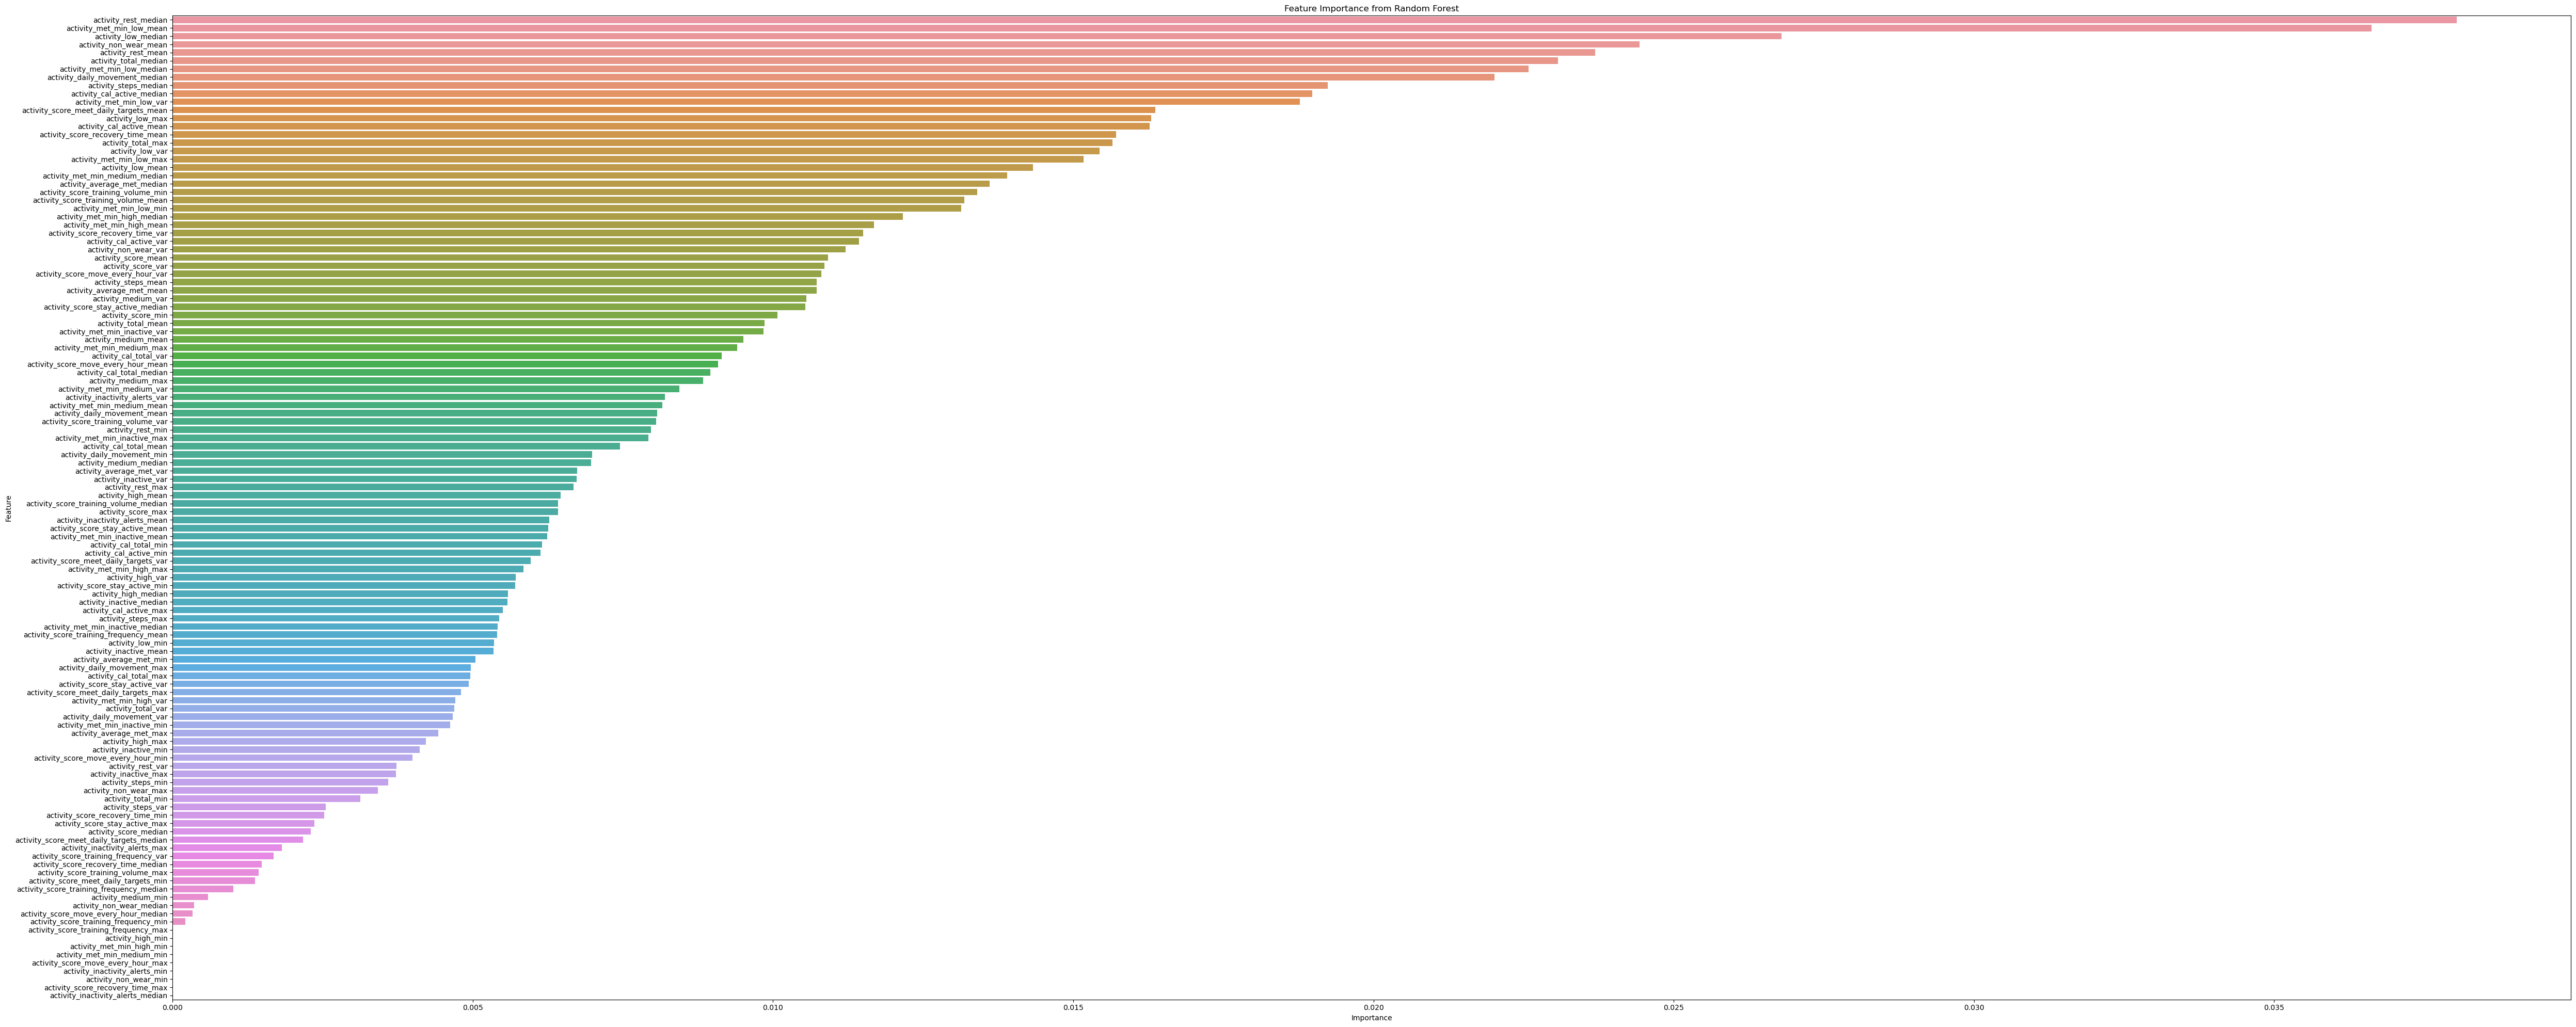

Validation Accuracy: 0.94


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# DIAG_NM을 종속 변수로 설정하고 독립 변수와 분리
X_train = train_activity_agg.drop(columns=['DIAG_NM'])
y_train = train_activity_agg['DIAG_NM']

# 랜덤포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

# 중요한 피처 추출
feature_importances = rf_model.feature_importances_

# 피처 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

# 시각화
plt.figure(figsize=(50, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 검증 데이터로 예측 정확도 확인 (선택 사항)
X_val = val_activity_agg.drop(columns=['DIAG_NM'])
y_val = val_activity_agg['DIAG_NM']
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

### **모든 Feature에 대한 PCA**

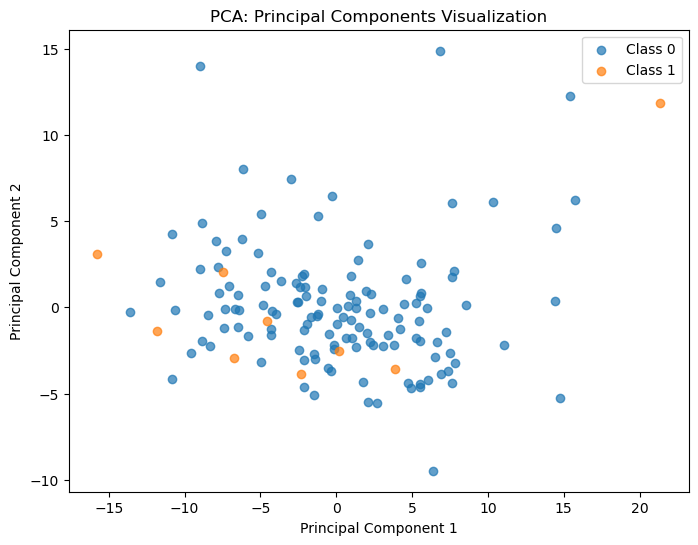

Explained Variance Ratio: [0.35324221 0.1140413 ]


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA 수행
pca = PCA(n_components=2)  # 주요 2개의 성분으로 차원 축소
X_train_pca = pca.fit_transform(X_train_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_train.values  # 타겟 레이블 추가

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                label=f'Class {target}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components Visualization')
plt.legend()
plt.show()

# PCA 설명 분산 비율 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

### **상위 중요도 피쳐만을 이용해서 로지스틱 회귀 수행**

In [21]:
top_features = importance_df.head(10)['Feature'].tolist()

print("Top 10 Features:", top_features)

Top 10 Features: ['activity_rest_median', 'activity_met_min_low_mean', 'activity_low_median', 'activity_non_wear_mean', 'activity_rest_mean', 'activity_total_median', 'activity_met_min_low_median', 'activity_daily_movement_median', 'activity_steps_median', 'activity_cal_active_median']


In [22]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_activity_agg[top_features]
y_train = train_activity_agg["DIAG_NM"]
X_test = val_activity_agg[top_features]
y_test = val_activity_agg["DIAG_NM"]

In [23]:
X_train.shape

(141, 10)

In [24]:
y_train.shape

(141,)

In [25]:
X_test.shape

(33, 10)

### **상위 중요도 피쳐 PCA**

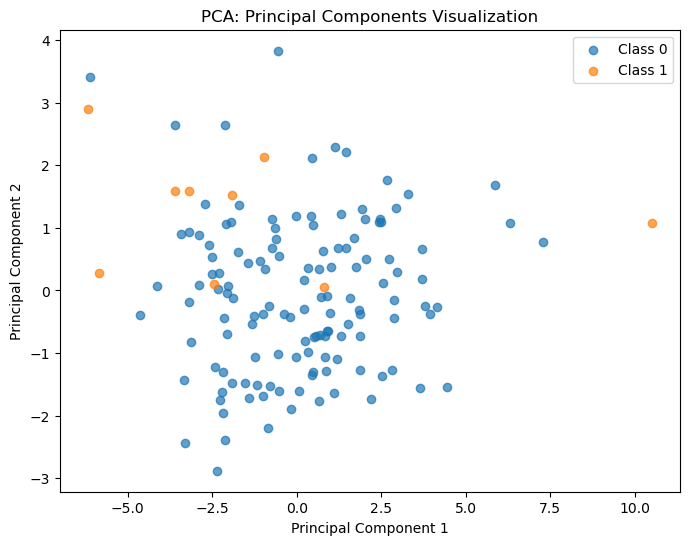

Explained Variance Ratio: [0.65445656 0.15616683]


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA 수행
pca = PCA(n_components=2)  # 주요 2개의 성분으로 차원 축소
X_train_pca = pca.fit_transform(X_train_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_train.values  # 타겟 레이블 추가

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                label=f'Class {target}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components Visualization')
plt.legend()
plt.show()

# PCA 설명 분산 비율 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

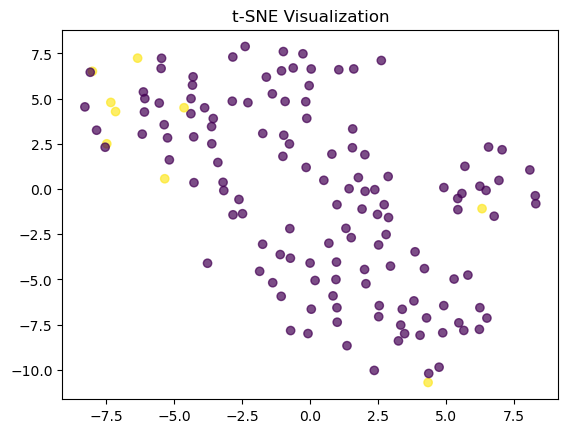

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()

In [28]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.136804
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  141
Model:                          Logit   Df Residuals:                      130
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.4237
Time:                        23:42:56   Log-Likelihood:                -19.289
converged:                       True   LL-Null:                       -33.470
Covariance Type:            nonrobust   LLR p-value:                  0.001579
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.8173      4.937     -0.571    

### **1. 로지스틱 회귀**

In [29]:
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.40      0.67      0.50         3

    accuracy                           0.88        33
   macro avg       0.68      0.78      0.72        33
weighted avg       0.91      0.88      0.89        33

Confusion Matrix:
 [[27  3]
 [ 1  2]]


### **2. 나이브 베이즈**

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 나이브 베이즈 모델 학습
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 예측
y_pred_nb = nb_model.predict(X_test)

# 평가
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.67      0.80         3

    accuracy                           0.97        33
   macro avg       0.98      0.83      0.89        33
weighted avg       0.97      0.97      0.97        33

Confusion Matrix:
 [[30  0]
 [ 1  2]]


### **3. XGBoost**

In [31]:
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.50      0.33      0.40         3

    accuracy                           0.91        33
   macro avg       0.72      0.65      0.68        33
weighted avg       0.90      0.91      0.90        33

Confusion Matrix:
 [[29  1]
 [ 2  1]]


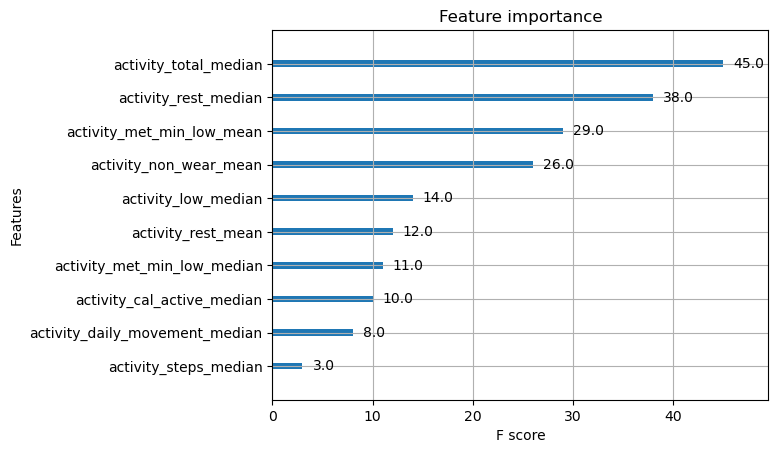

In [32]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

### **4. LightGBM**

In [33]:
from lightgbm import LGBMClassifier

# LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train, y_train)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 평가
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.9393939393939394
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.33      0.50         3

    accuracy                           0.94        33
   macro avg       0.97      0.67      0.73        33
weighted avg       0.94      0.94      0.93        33

Confusion Matrix:
 [[30  0]
 [ 2  1]]


### **5. Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 학습
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 평가
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.00      0.00      0.00         3

    accuracy                           0.88        33
   macro avg       0.45      0.48      0.47        33
weighted avg       0.82      0.88      0.85        33

Confusion Matrix:
 [[29  1]
 [ 3  0]]


### **SMOTE**

In [35]:
from imblearn.over_sampling import SMOTE

# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_activity_agg[top_features]
y_train = train_activity_agg["DIAG_NM"]
X_test = val_activity_agg[top_features]
y_test = val_activity_agg["DIAG_NM"]

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (141, 10) (141,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (264, 10) (264,)
SMOTE 적용 후 레이블 값 분포: 
 DIAG_NM
0    132
1    132
Name: count, dtype: int64


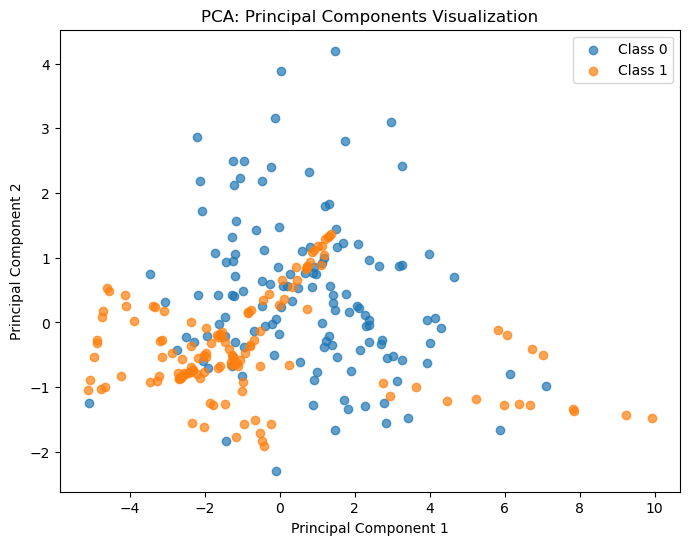

Explained Variance Ratio: [0.73696988 0.11442688]


In [36]:
# SMOTE로 학습된 데이터 (X_train_over, y_train_over)를 표준화
scaler = StandardScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)

# PCA 수행
pca = PCA(n_components=2)  # 주요 2개의 성분으로 차원 축소
X_train_pca = pca.fit_transform(X_train_over_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_train_over.values  # 타겟 레이블 추가

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                label=f'Class {target}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components Visualization')
plt.legend()
plt.show()

# PCA 설명 분산 비율 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [37]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train_over)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train_over, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.285315
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  264
Model:                          Logit   Df Residuals:                      253
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.5884
Time:                        23:42:58   Log-Likelihood:                -75.323
converged:                       True   LL-Null:                       -182.99
Covariance Type:            nonrobust   LLR p-value:                 1.011e-40
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.1910      3.768     -1.378     

### **1. 로지스틱 회귀**

In [38]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train_over, y_train_over)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8484848484848485
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.33      0.67      0.44         3

    accuracy                           0.85        33
   macro avg       0.65      0.77      0.68        33
weighted avg       0.91      0.85      0.87        33

Confusion Matrix:
 [[26  4]
 [ 1  2]]


### **2. 나이브 베이즈**

In [39]:
# 나이브 베이즈 모델 학습
nb_model = GaussianNB()
nb_model.fit(X_train_over, y_train_over)

# 예측
y_pred_nb = nb_model.predict(X_test)

# 평가
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        30
           1       0.33      1.00      0.50         3

    accuracy                           0.82        33
   macro avg       0.67      0.90      0.69        33
weighted avg       0.94      0.82      0.85        33

Confusion Matrix:
 [[24  6]
 [ 0  3]]


### **3. XGBoost**

In [40]:
# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_over, y_train_over)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.00      0.00      0.00         3

    accuracy                           0.88        33
   macro avg       0.45      0.48      0.47        33
weighted avg       0.82      0.88      0.85        33

Confusion Matrix:
 [[29  1]
 [ 3  0]]


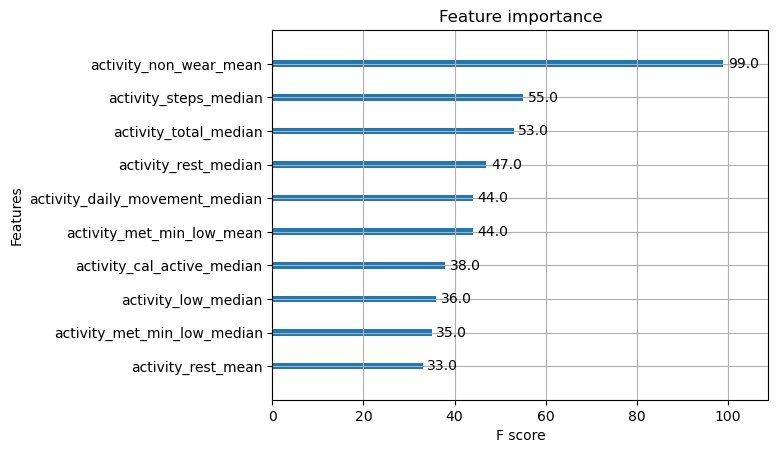

In [41]:
plot_importance(xgb_model)
plt.show()

### **4. LightGBM**

In [42]:
# LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train_over, y_train_over)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 평가
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.50      0.33      0.40         3

    accuracy                           0.91        33
   macro avg       0.72      0.65      0.68        33
weighted avg       0.90      0.91      0.90        33

Confusion Matrix:
 [[29  1]
 [ 2  1]]


### **5. Decision Tree**

In [43]:
# 결정 트리 모델 학습
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_over, y_train_over)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 평가
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.00      0.00      0.00         3

    accuracy                           0.88        33
   macro avg       0.45      0.48      0.47        33
weighted avg       0.82      0.88      0.85        33

Confusion Matrix:
 [[29  1]
 [ 3  0]]


-----------------------------------------------------------------------------------------------------------------------------
현재까지 Activity 데이터 만을 이용해 비교를 시도해 본 결과, 모델의 예측 결과가 일관성이 없고, PCA 또한 겹치는 부분이 다수 존재했다.

따라서, 모델의 예측결과를 신뢰하기는 어렵다고 생각된다.   

-----------------------------------------------------------------------------------------------------------------------------

## **실험 2. Activity Groupby + Sleep Groupby**

### **train_sleep groupby**

In [44]:
train_sleep_groupby = train_sleep.groupby('EMAIL')
train_sleep_agg = pd.DataFrame()

In [45]:
train_sleep_agg['sleep_restless_mean'] = train_sleep_groupby['sleep_restless'].mean()
train_sleep_agg['sleep_restless_max'] = train_sleep_groupby['sleep_restless'].max()
train_sleep_agg['sleep_restless_min'] = train_sleep_groupby['sleep_restless'].min()
train_sleep_agg['sleep_restless_var'] = train_sleep_groupby['sleep_restless'].var()
train_sleep_agg['sleep_restless_median'] = train_sleep_groupby['sleep_restless'].median()

train_sleep_agg['sleep_score_disturbances_mean'] = train_sleep_groupby['sleep_score_disturbances'].mean()
train_sleep_agg['sleep_score_disturbances_max'] = train_sleep_groupby['sleep_score_disturbances'].max()
train_sleep_agg['sleep_score_disturbances_min'] = train_sleep_groupby['sleep_score_disturbances'].min()
train_sleep_agg['sleep_score_disturbances_var'] = train_sleep_groupby['sleep_score_disturbances'].var()
train_sleep_agg['sleep_score_disturbances_median'] = train_sleep_groupby['sleep_score_disturbances'].median()

train_sleep_agg['sleep_midpoint_at_delta_mean'] = train_sleep_groupby['sleep_midpoint_at_delta'].mean()
train_sleep_agg['sleep_midpoint_at_delta_max'] = train_sleep_groupby['sleep_midpoint_at_delta'].max()
train_sleep_agg['sleep_midpoint_at_delta_min'] = train_sleep_groupby['sleep_midpoint_at_delta'].min()
train_sleep_agg['sleep_midpoint_at_delta_var'] = train_sleep_groupby['sleep_midpoint_at_delta'].var()
train_sleep_agg['sleep_midpoint_at_delta_median'] = train_sleep_groupby['sleep_midpoint_at_delta'].median()

train_sleep_agg['sleep_hr_lowest_mean'] = train_sleep_groupby['sleep_hr_lowest'].mean()
train_sleep_agg['sleep_hr_lowest_max'] = train_sleep_groupby['sleep_hr_lowest'].max()
train_sleep_agg['sleep_hr_lowest_min'] = train_sleep_groupby['sleep_hr_lowest'].min()
train_sleep_agg['sleep_hr_lowest_var'] = train_sleep_groupby['sleep_hr_lowest'].var()
train_sleep_agg['sleep_hr_lowest_median'] = train_sleep_groupby['sleep_hr_lowest'].median()

train_sleep_agg['sleep_hr_average_mean'] = train_sleep_groupby['sleep_hr_average'].mean()
train_sleep_agg['sleep_hr_average_max'] = train_sleep_groupby['sleep_hr_average'].max()
train_sleep_agg['sleep_hr_average_min'] = train_sleep_groupby['sleep_hr_average'].min()
train_sleep_agg['sleep_hr_average_var'] = train_sleep_groupby['sleep_hr_average'].var()
train_sleep_agg['sleep_hr_average_median'] = train_sleep_groupby['sleep_hr_average'].median()

train_sleep_agg['sleep_light_mean'] = train_sleep_groupby['sleep_light'].mean()
train_sleep_agg['sleep_light_max'] = train_sleep_groupby['sleep_light'].max()
train_sleep_agg['sleep_light_min'] = train_sleep_groupby['sleep_light'].min()
train_sleep_agg['sleep_light_var'] = train_sleep_groupby['sleep_light'].var()
train_sleep_agg['sleep_light_median'] = train_sleep_groupby['sleep_light'].median()

train_sleep_agg['sleep_score_deep_mean'] = train_sleep_groupby['sleep_score_deep'].mean()
train_sleep_agg['sleep_score_deep_max'] = train_sleep_groupby['sleep_score_deep'].max()
train_sleep_agg['sleep_score_deep_min'] = train_sleep_groupby['sleep_score_deep'].min()
train_sleep_agg['sleep_score_deep_var'] = train_sleep_groupby['sleep_score_deep'].var()
train_sleep_agg['sleep_score_deep_median'] = train_sleep_groupby['sleep_score_deep'].median()

train_sleep_agg['sleep_score_latency_mean'] = train_sleep_groupby['sleep_score_latency'].mean()
train_sleep_agg['sleep_score_latency_max'] = train_sleep_groupby['sleep_score_latency'].max()
train_sleep_agg['sleep_score_latency_min'] = train_sleep_groupby['sleep_score_latency'].min()
train_sleep_agg['sleep_score_latency_var'] = train_sleep_groupby['sleep_score_latency'].var()
train_sleep_agg['sleep_score_latency_median'] = train_sleep_groupby['sleep_score_latency'].median()

train_sleep_agg['sleep_breath_average_mean'] = train_sleep_groupby['sleep_breath_average'].mean()
train_sleep_agg['sleep_breath_average_max'] = train_sleep_groupby['sleep_breath_average'].max()
train_sleep_agg['sleep_breath_average_min'] = train_sleep_groupby['sleep_breath_average'].min()
train_sleep_agg['sleep_breath_average_var'] = train_sleep_groupby['sleep_breath_average'].var()
train_sleep_agg['sleep_breath_average_median'] = train_sleep_groupby['sleep_breath_average'].median()

train_sleep_agg['sleep_score_alignment_mean'] = train_sleep_groupby['sleep_score_alignment'].mean()
train_sleep_agg['sleep_score_alignment_max'] = train_sleep_groupby['sleep_score_alignment'].max()
train_sleep_agg['sleep_score_alignment_min'] = train_sleep_groupby['sleep_score_alignment'].min()
train_sleep_agg['sleep_score_alignment_var'] = train_sleep_groupby['sleep_score_alignment'].var()
train_sleep_agg['sleep_score_alignment_median'] = train_sleep_groupby['sleep_score_alignment'].median()

train_sleep_agg['sleep_rmssd_mean'] = train_sleep_groupby['sleep_rmssd'].mean()
train_sleep_agg['sleep_rmssd_max'] = train_sleep_groupby['sleep_rmssd'].max()
train_sleep_agg['sleep_rmssd_min'] = train_sleep_groupby['sleep_rmssd'].min()
train_sleep_agg['sleep_rmssd_var'] = train_sleep_groupby['sleep_rmssd'].var()
train_sleep_agg['sleep_rmssd_median'] = train_sleep_groupby['sleep_rmssd'].median()

train_sleep_agg['sleep_duration_mean'] = train_sleep_groupby['sleep_duration'].mean()
train_sleep_agg['sleep_duration_max'] = train_sleep_groupby['sleep_duration'].max()
train_sleep_agg['sleep_duration_min'] = train_sleep_groupby['sleep_duration'].min()
train_sleep_agg['sleep_duration_var'] = train_sleep_groupby['sleep_duration'].var()
train_sleep_agg['sleep_duration_median'] = train_sleep_groupby['sleep_duration'].median()

train_sleep_agg['sleep_rem_mean'] = train_sleep_groupby['sleep_rem'].mean()
train_sleep_agg['sleep_rem_max'] = train_sleep_groupby['sleep_rem'].max()
train_sleep_agg['sleep_rem_min'] = train_sleep_groupby['sleep_rem'].min()
train_sleep_agg['sleep_rem_var'] = train_sleep_groupby['sleep_rem'].var()
train_sleep_agg['sleep_rem_median'] = train_sleep_groupby['sleep_rem'].median()

train_sleep_agg['sleep_score_rem_mean'] = train_sleep_groupby['sleep_score_rem'].mean()
train_sleep_agg['sleep_score_rem_max'] = train_sleep_groupby['sleep_score_rem'].max()
train_sleep_agg['sleep_score_rem_min'] = train_sleep_groupby['sleep_score_rem'].min()
train_sleep_agg['sleep_score_rem_var'] = train_sleep_groupby['sleep_score_rem'].var()
train_sleep_agg['sleep_score_rem_median'] = train_sleep_groupby['sleep_score_rem'].median()

train_sleep_agg['sleep_total_mean'] = train_sleep_groupby['sleep_total'].mean()
train_sleep_agg['sleep_total_max'] = train_sleep_groupby['sleep_total'].max()
train_sleep_agg['sleep_total_min'] = train_sleep_groupby['sleep_total'].min()
train_sleep_agg['sleep_total_var'] = train_sleep_groupby['sleep_total'].var()
train_sleep_agg['sleep_total_median'] = train_sleep_groupby['sleep_total'].median()

train_sleep_agg['sleep_score_efficiency_mean'] = train_sleep_groupby['sleep_score_efficiency'].mean()
train_sleep_agg['sleep_score_efficiency_max'] = train_sleep_groupby['sleep_score_efficiency'].max()
train_sleep_agg['sleep_score_efficiency_min'] = train_sleep_groupby['sleep_score_efficiency'].min()
train_sleep_agg['sleep_score_efficiency_var'] = train_sleep_groupby['sleep_score_efficiency'].var()
train_sleep_agg['sleep_score_efficiency_median'] = train_sleep_groupby['sleep_score_efficiency'].median()

train_sleep_agg['sleep_onset_latency_mean'] = train_sleep_groupby['sleep_onset_latency'].mean()
train_sleep_agg['sleep_onset_latency_max'] = train_sleep_groupby['sleep_onset_latency'].max()
train_sleep_agg['sleep_onset_latency_min'] = train_sleep_groupby['sleep_onset_latency'].min()
train_sleep_agg['sleep_onset_latency_var'] = train_sleep_groupby['sleep_onset_latency'].var()
train_sleep_agg['sleep_onset_latency_median'] = train_sleep_groupby['sleep_onset_latency'].median()

train_sleep_agg['sleep_deep_mean'] = train_sleep_groupby['sleep_deep'].mean()
train_sleep_agg['sleep_deep_max'] = train_sleep_groupby['sleep_deep'].max()
train_sleep_agg['sleep_deep_min'] = train_sleep_groupby['sleep_deep'].min()
train_sleep_agg['sleep_deep_var'] = train_sleep_groupby['sleep_deep'].var()
train_sleep_agg['sleep_deep_median'] = train_sleep_groupby['sleep_deep'].median()

train_sleep_agg['sleep_temperature_deviation_mean'] = train_sleep_groupby['sleep_temperature_deviation'].mean()
train_sleep_agg['sleep_temperature_deviation_max'] = train_sleep_groupby['sleep_temperature_deviation'].max()
train_sleep_agg['sleep_temperature_deviation_min'] = train_sleep_groupby['sleep_temperature_deviation'].min()
train_sleep_agg['sleep_temperature_deviation_var'] = train_sleep_groupby['sleep_temperature_deviation'].var()
train_sleep_agg['sleep_temperature_deviation_median'] = train_sleep_groupby['sleep_temperature_deviation'].median()

train_sleep_agg['sleep_score_total_mean'] = train_sleep_groupby['sleep_score_total'].mean()
train_sleep_agg['sleep_score_total_max'] = train_sleep_groupby['sleep_score_total'].max()
train_sleep_agg['sleep_score_total_min'] = train_sleep_groupby['sleep_score_total'].min()
train_sleep_agg['sleep_score_total_var'] = train_sleep_groupby['sleep_score_total'].var()
train_sleep_agg['sleep_score_total_median'] = train_sleep_groupby['sleep_score_total'].median()

train_sleep_agg['sleep_efficiency_mean'] = train_sleep_groupby['sleep_efficiency'].mean()
train_sleep_agg['sleep_efficiency_max'] = train_sleep_groupby['sleep_efficiency'].max()
train_sleep_agg['sleep_efficiency_min'] = train_sleep_groupby['sleep_efficiency'].min()
train_sleep_agg['sleep_efficiency_var'] = train_sleep_groupby['sleep_efficiency'].var()
train_sleep_agg['sleep_efficiency_median'] = train_sleep_groupby['sleep_efficiency'].median()

train_sleep_agg['sleep_temperature_delta_mean'] = train_sleep_groupby['sleep_temperature_delta'].mean()
train_sleep_agg['sleep_temperature_delta_max'] = train_sleep_groupby['sleep_temperature_delta'].max()
train_sleep_agg['sleep_temperature_delta_min'] = train_sleep_groupby['sleep_temperature_delta'].min()
train_sleep_agg['sleep_temperature_delta_var'] = train_sleep_groupby['sleep_temperature_delta'].var()
train_sleep_agg['sleep_temperature_delta_median'] = train_sleep_groupby['sleep_temperature_delta'].median()

train_sleep_agg['sleep_midpoint_time_mean'] = train_sleep_groupby['sleep_midpoint_time'].mean()
train_sleep_agg['sleep_midpoint_time_max'] = train_sleep_groupby['sleep_midpoint_time'].max()
train_sleep_agg['sleep_midpoint_time_min'] = train_sleep_groupby['sleep_midpoint_time'].min()
train_sleep_agg['sleep_midpoint_time_var'] = train_sleep_groupby['sleep_midpoint_time'].var()
train_sleep_agg['sleep_midpoint_time_median'] = train_sleep_groupby['sleep_midpoint_time'].median()

train_sleep_agg['sleep_score_mean'] = train_sleep_groupby['sleep_score'].mean()
train_sleep_agg['sleep_score_max'] = train_sleep_groupby['sleep_score'].max()
train_sleep_agg['sleep_score_min'] = train_sleep_groupby['sleep_score'].min()
train_sleep_agg['sleep_score_var'] = train_sleep_groupby['sleep_score'].var()
train_sleep_agg['sleep_score_median'] = train_sleep_groupby['sleep_score'].median()

train_sleep_agg['sleep_awake_mean'] = train_sleep_groupby['sleep_awake'].mean()
train_sleep_agg['sleep_awake_max'] = train_sleep_groupby['sleep_awake'].max()
train_sleep_agg['sleep_awake_min'] = train_sleep_groupby['sleep_awake'].min()
train_sleep_agg['sleep_awake_var'] = train_sleep_groupby['sleep_awake'].var()
train_sleep_agg['sleep_awake_median'] = train_sleep_groupby['sleep_awake'].median()

### **validation data에도 똑같은 작업수행**

In [46]:
val_sleep_groupby = val_sleep.groupby('EMAIL')
val_sleep_agg = pd.DataFrame()

In [47]:
val_sleep_agg['sleep_restless_mean'] = val_sleep_groupby['sleep_restless'].mean()
val_sleep_agg['sleep_restless_max'] = val_sleep_groupby['sleep_restless'].max()
val_sleep_agg['sleep_restless_min'] = val_sleep_groupby['sleep_restless'].min()
val_sleep_agg['sleep_restless_var'] = val_sleep_groupby['sleep_restless'].var()
val_sleep_agg['sleep_restless_median'] = val_sleep_groupby['sleep_restless'].median()

val_sleep_agg['sleep_score_disturbances_mean'] = val_sleep_groupby['sleep_score_disturbances'].mean()
val_sleep_agg['sleep_score_disturbances_max'] = val_sleep_groupby['sleep_score_disturbances'].max()
val_sleep_agg['sleep_score_disturbances_min'] = val_sleep_groupby['sleep_score_disturbances'].min()
val_sleep_agg['sleep_score_disturbances_var'] = val_sleep_groupby['sleep_score_disturbances'].var()
val_sleep_agg['sleep_score_disturbances_median'] = val_sleep_groupby['sleep_score_disturbances'].median()

val_sleep_agg['sleep_midpoint_at_delta_mean'] = val_sleep_groupby['sleep_midpoint_at_delta'].mean()
val_sleep_agg['sleep_midpoint_at_delta_max'] = val_sleep_groupby['sleep_midpoint_at_delta'].max()
val_sleep_agg['sleep_midpoint_at_delta_min'] = val_sleep_groupby['sleep_midpoint_at_delta'].min()
val_sleep_agg['sleep_midpoint_at_delta_var'] = val_sleep_groupby['sleep_midpoint_at_delta'].var()
val_sleep_agg['sleep_midpoint_at_delta_median'] = val_sleep_groupby['sleep_midpoint_at_delta'].median()

val_sleep_agg['sleep_hr_lowest_mean'] = val_sleep_groupby['sleep_hr_lowest'].mean()
val_sleep_agg['sleep_hr_lowest_max'] = val_sleep_groupby['sleep_hr_lowest'].max()
val_sleep_agg['sleep_hr_lowest_min'] = val_sleep_groupby['sleep_hr_lowest'].min()
val_sleep_agg['sleep_hr_lowest_var'] = val_sleep_groupby['sleep_hr_lowest'].var()
val_sleep_agg['sleep_hr_lowest_median'] = val_sleep_groupby['sleep_hr_lowest'].median()

val_sleep_agg['sleep_hr_average_mean'] = val_sleep_groupby['sleep_hr_average'].mean()
val_sleep_agg['sleep_hr_average_max'] = val_sleep_groupby['sleep_hr_average'].max()
val_sleep_agg['sleep_hr_average_min'] = val_sleep_groupby['sleep_hr_average'].min()
val_sleep_agg['sleep_hr_average_var'] = val_sleep_groupby['sleep_hr_average'].var()
val_sleep_agg['sleep_hr_average_median'] = val_sleep_groupby['sleep_hr_average'].median()

val_sleep_agg['sleep_light_mean'] = val_sleep_groupby['sleep_light'].mean()
val_sleep_agg['sleep_light_max'] = val_sleep_groupby['sleep_light'].max()
val_sleep_agg['sleep_light_min'] = val_sleep_groupby['sleep_light'].min()
val_sleep_agg['sleep_light_var'] = val_sleep_groupby['sleep_light'].var()
val_sleep_agg['sleep_light_median'] = val_sleep_groupby['sleep_light'].median()

val_sleep_agg['sleep_score_deep_mean'] = val_sleep_groupby['sleep_score_deep'].mean()
val_sleep_agg['sleep_score_deep_max'] = val_sleep_groupby['sleep_score_deep'].max()
val_sleep_agg['sleep_score_deep_min'] = val_sleep_groupby['sleep_score_deep'].min()
val_sleep_agg['sleep_score_deep_var'] = val_sleep_groupby['sleep_score_deep'].var()
val_sleep_agg['sleep_score_deep_median'] = val_sleep_groupby['sleep_score_deep'].median()

val_sleep_agg['sleep_score_latency_mean'] = val_sleep_groupby['sleep_score_latency'].mean()
val_sleep_agg['sleep_score_latency_max'] = val_sleep_groupby['sleep_score_latency'].max()
val_sleep_agg['sleep_score_latency_min'] = val_sleep_groupby['sleep_score_latency'].min()
val_sleep_agg['sleep_score_latency_var'] = val_sleep_groupby['sleep_score_latency'].var()
val_sleep_agg['sleep_score_latency_median'] = val_sleep_groupby['sleep_score_latency'].median()

val_sleep_agg['sleep_breath_average_mean'] = val_sleep_groupby['sleep_breath_average'].mean()
val_sleep_agg['sleep_breath_average_max'] = val_sleep_groupby['sleep_breath_average'].max()
val_sleep_agg['sleep_breath_average_min'] = val_sleep_groupby['sleep_breath_average'].min()
val_sleep_agg['sleep_breath_average_var'] = val_sleep_groupby['sleep_breath_average'].var()
val_sleep_agg['sleep_breath_average_median'] = val_sleep_groupby['sleep_breath_average'].median()

val_sleep_agg['sleep_score_alignment_mean'] = val_sleep_groupby['sleep_score_alignment'].mean()
val_sleep_agg['sleep_score_alignment_max'] = val_sleep_groupby['sleep_score_alignment'].max()
val_sleep_agg['sleep_score_alignment_min'] = val_sleep_groupby['sleep_score_alignment'].min()
val_sleep_agg['sleep_score_alignment_var'] = val_sleep_groupby['sleep_score_alignment'].var()
val_sleep_agg['sleep_score_alignment_median'] = val_sleep_groupby['sleep_score_alignment'].median()

val_sleep_agg['sleep_rmssd_mean'] = val_sleep_groupby['sleep_rmssd'].mean()
val_sleep_agg['sleep_rmssd_max'] = val_sleep_groupby['sleep_rmssd'].max()
val_sleep_agg['sleep_rmssd_min'] = val_sleep_groupby['sleep_rmssd'].min()
val_sleep_agg['sleep_rmssd_var'] = val_sleep_groupby['sleep_rmssd'].var()
val_sleep_agg['sleep_rmssd_median'] = val_sleep_groupby['sleep_rmssd'].median()

val_sleep_agg['sleep_duration_mean'] = val_sleep_groupby['sleep_duration'].mean()
val_sleep_agg['sleep_duration_max'] = val_sleep_groupby['sleep_duration'].max()
val_sleep_agg['sleep_duration_min'] = val_sleep_groupby['sleep_duration'].min()
val_sleep_agg['sleep_duration_var'] = val_sleep_groupby['sleep_duration'].var()
val_sleep_agg['sleep_duration_median'] = val_sleep_groupby['sleep_duration'].median()

val_sleep_agg['sleep_rem_mean'] = val_sleep_groupby['sleep_rem'].mean()
val_sleep_agg['sleep_rem_max'] = val_sleep_groupby['sleep_rem'].max()
val_sleep_agg['sleep_rem_min'] = val_sleep_groupby['sleep_rem'].min()
val_sleep_agg['sleep_rem_var'] = val_sleep_groupby['sleep_rem'].var()
val_sleep_agg['sleep_rem_median'] = val_sleep_groupby['sleep_rem'].median()

val_sleep_agg['sleep_score_rem_mean'] = val_sleep_groupby['sleep_score_rem'].mean()
val_sleep_agg['sleep_score_rem_max'] = val_sleep_groupby['sleep_score_rem'].max()
val_sleep_agg['sleep_score_rem_min'] = val_sleep_groupby['sleep_score_rem'].min()
val_sleep_agg['sleep_score_rem_var'] = val_sleep_groupby['sleep_score_rem'].var()
val_sleep_agg['sleep_score_rem_median'] = val_sleep_groupby['sleep_score_rem'].median()

val_sleep_agg['sleep_total_mean'] = val_sleep_groupby['sleep_total'].mean()
val_sleep_agg['sleep_total_max'] = val_sleep_groupby['sleep_total'].max()
val_sleep_agg['sleep_total_min'] = val_sleep_groupby['sleep_total'].min()
val_sleep_agg['sleep_total_var'] = val_sleep_groupby['sleep_total'].var()
val_sleep_agg['sleep_total_median'] = val_sleep_groupby['sleep_total'].median()

val_sleep_agg['sleep_score_efficiency_mean'] = val_sleep_groupby['sleep_score_efficiency'].mean()
val_sleep_agg['sleep_score_efficiency_max'] = val_sleep_groupby['sleep_score_efficiency'].max()
val_sleep_agg['sleep_score_efficiency_min'] = val_sleep_groupby['sleep_score_efficiency'].min()
val_sleep_agg['sleep_score_efficiency_var'] = val_sleep_groupby['sleep_score_efficiency'].var()
val_sleep_agg['sleep_score_efficiency_median'] = val_sleep_groupby['sleep_score_efficiency'].median()

val_sleep_agg['sleep_onset_latency_mean'] = val_sleep_groupby['sleep_onset_latency'].mean()
val_sleep_agg['sleep_onset_latency_max'] = val_sleep_groupby['sleep_onset_latency'].max()
val_sleep_agg['sleep_onset_latency_min'] = val_sleep_groupby['sleep_onset_latency'].min()
val_sleep_agg['sleep_onset_latency_var'] = val_sleep_groupby['sleep_onset_latency'].var()
val_sleep_agg['sleep_onset_latency_median'] = val_sleep_groupby['sleep_onset_latency'].median()

val_sleep_agg['sleep_deep_mean'] = val_sleep_groupby['sleep_deep'].mean()
val_sleep_agg['sleep_deep_max'] = val_sleep_groupby['sleep_deep'].max()
val_sleep_agg['sleep_deep_min'] = val_sleep_groupby['sleep_deep'].min()
val_sleep_agg['sleep_deep_var'] = val_sleep_groupby['sleep_deep'].var()
val_sleep_agg['sleep_deep_median'] = val_sleep_groupby['sleep_deep'].median()

val_sleep_agg['sleep_temperature_deviation_mean'] = val_sleep_groupby['sleep_temperature_deviation'].mean()
val_sleep_agg['sleep_temperature_deviation_max'] = val_sleep_groupby['sleep_temperature_deviation'].max()
val_sleep_agg['sleep_temperature_deviation_min'] = val_sleep_groupby['sleep_temperature_deviation'].min()
val_sleep_agg['sleep_temperature_deviation_var'] = val_sleep_groupby['sleep_temperature_deviation'].var()
val_sleep_agg['sleep_temperature_deviation_median'] = val_sleep_groupby['sleep_temperature_deviation'].median()

val_sleep_agg['sleep_score_total_mean'] = val_sleep_groupby['sleep_score_total'].mean()
val_sleep_agg['sleep_score_total_max'] = val_sleep_groupby['sleep_score_total'].max()
val_sleep_agg['sleep_score_total_min'] = val_sleep_groupby['sleep_score_total'].min()
val_sleep_agg['sleep_score_total_var'] = val_sleep_groupby['sleep_score_total'].var()
val_sleep_agg['sleep_score_total_median'] = val_sleep_groupby['sleep_score_total'].median()

val_sleep_agg['sleep_efficiency_mean'] = val_sleep_groupby['sleep_efficiency'].mean()
val_sleep_agg['sleep_efficiency_max'] = val_sleep_groupby['sleep_efficiency'].max()
val_sleep_agg['sleep_efficiency_min'] = val_sleep_groupby['sleep_efficiency'].min()
val_sleep_agg['sleep_efficiency_var'] = val_sleep_groupby['sleep_efficiency'].var()
val_sleep_agg['sleep_efficiency_median'] = val_sleep_groupby['sleep_efficiency'].median()

val_sleep_agg['sleep_temperature_delta_mean'] = val_sleep_groupby['sleep_temperature_delta'].mean()
val_sleep_agg['sleep_temperature_delta_max'] = val_sleep_groupby['sleep_temperature_delta'].max()
val_sleep_agg['sleep_temperature_delta_min'] = val_sleep_groupby['sleep_temperature_delta'].min()
val_sleep_agg['sleep_temperature_delta_var'] = val_sleep_groupby['sleep_temperature_delta'].var()
val_sleep_agg['sleep_temperature_delta_median'] = val_sleep_groupby['sleep_temperature_delta'].median()

val_sleep_agg['sleep_midpoint_time_mean'] = val_sleep_groupby['sleep_midpoint_time'].mean()
val_sleep_agg['sleep_midpoint_time_max'] = val_sleep_groupby['sleep_midpoint_time'].max()
val_sleep_agg['sleep_midpoint_time_min'] = val_sleep_groupby['sleep_midpoint_time'].min()
val_sleep_agg['sleep_midpoint_time_var'] = val_sleep_groupby['sleep_midpoint_time'].var()
val_sleep_agg['sleep_midpoint_time_median'] = val_sleep_groupby['sleep_midpoint_time'].median()

val_sleep_agg['sleep_score_mean'] = val_sleep_groupby['sleep_score'].mean()
val_sleep_agg['sleep_score_max'] = val_sleep_groupby['sleep_score'].max()
val_sleep_agg['sleep_score_min'] = val_sleep_groupby['sleep_score'].min()
val_sleep_agg['sleep_score_var'] = val_sleep_groupby['sleep_score'].var()
val_sleep_agg['sleep_score_median'] = val_sleep_groupby['sleep_score'].median()

val_sleep_agg['sleep_awake_mean'] = val_sleep_groupby['sleep_awake'].mean()
val_sleep_agg['sleep_awake_max'] = val_sleep_groupby['sleep_awake'].max()
val_sleep_agg['sleep_awake_min'] = val_sleep_groupby['sleep_awake'].min()
val_sleep_agg['sleep_awake_var'] = val_sleep_groupby['sleep_awake'].var()
val_sleep_agg['sleep_awake_median'] = val_sleep_groupby['sleep_awake'].median()

In [48]:
train_agg = pd.merge(train_activity_agg_original, train_sleep_agg, on='EMAIL', how='inner')

In [1]:
train_agg = train_agg.merge(training_label, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')
train_agg = train_agg.drop(columns=['SAMPLE_EMAIL'])

NameError: name 'train_agg' is not defined

In [50]:
val_agg = pd.merge(val_activity_agg_original, val_sleep_agg, on='EMAIL', how='inner')

In [51]:
val_agg = val_agg.merge(val_label, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')
val_agg = val_agg.drop(columns=['SAMPLE_EMAIL'])

In [52]:
train_agg["DIAG_NM"] = train_agg.DIAG_NM.map({"CN":0, "MCI":0, 'Dem':1})
val_agg["DIAG_NM"] = val_agg.DIAG_NM.map({"CN":0, "MCI":0, 'Dem':1})

### **랜덤포레스트, XGBoost로 중요한 피쳐 확인하기 + PCA**

                                   Feature  Importance
234             sleep_midpoint_time_median    0.043812
179                  sleep_duration_median    0.027063
149                     sleep_light_median    0.022879
9               activity_cal_active_median    0.022866
145                       sleep_light_mean    0.022437
..                                     ...         ...
209                      sleep_deep_median    0.000000
91        activity_score_recovery_time_max    0.000000
89   activity_score_move_every_hour_median    0.000000
87      activity_score_move_every_hour_min    0.000000
94     activity_score_recovery_time_median    0.000000

[245 rows x 2 columns]


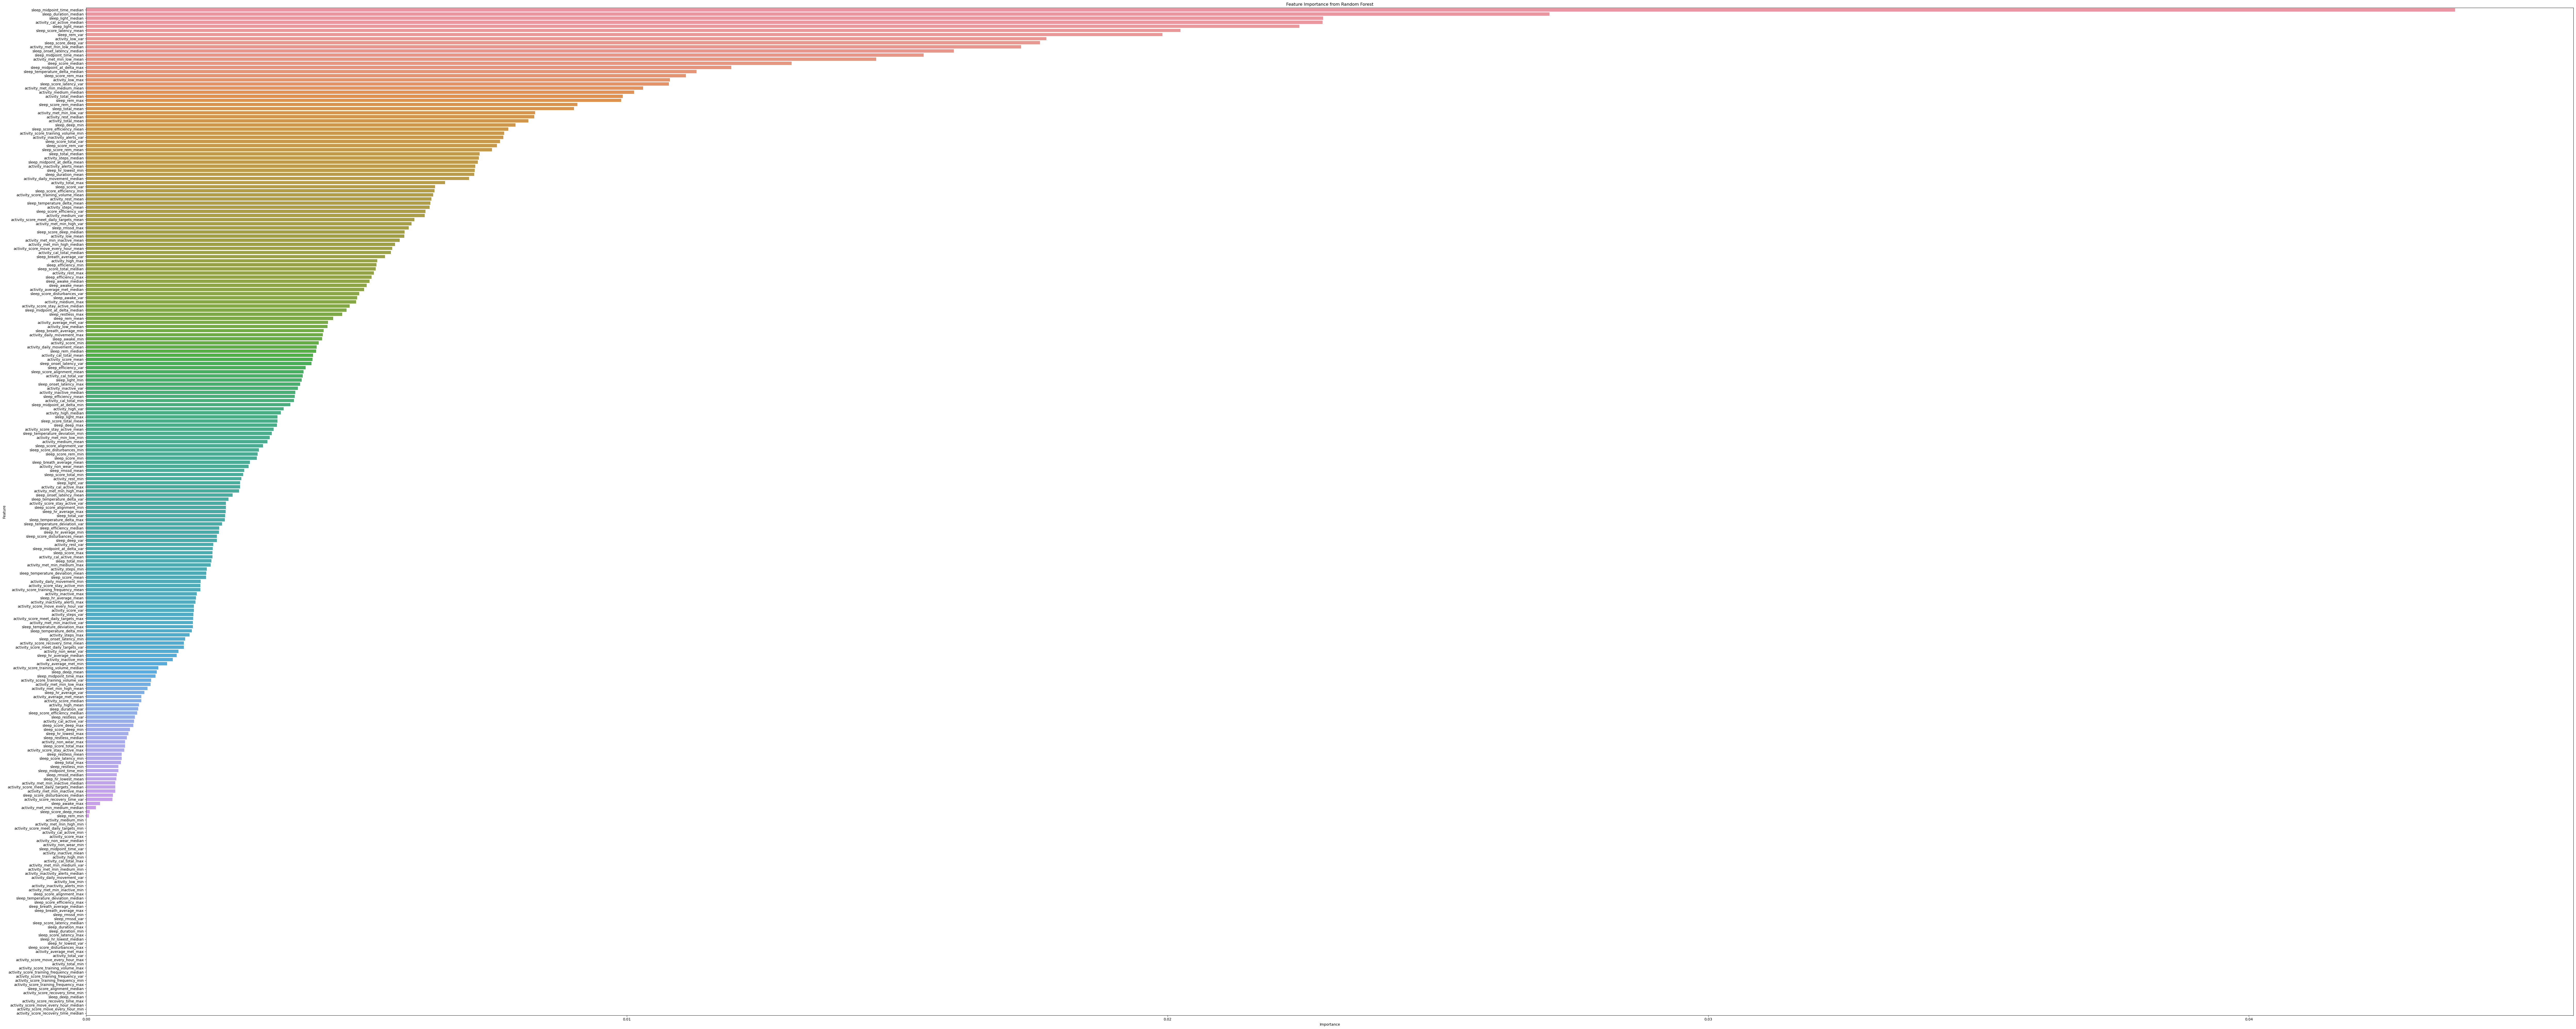

Validation Accuracy: 0.94


In [53]:
X_train = train_agg.drop(columns=['DIAG_NM'])
y_train = train_agg['DIAG_NM']

# 랜덤포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 중요한 피처 추출
feature_importances = rf_model.feature_importances_

# 피처 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

# 시각화
plt.figure(figsize=(100,40))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 검증 데이터로 예측 정확도 확인 (선택 사항)
X_val = val_agg.drop(columns=['DIAG_NM'])
y_val = val_agg['DIAG_NM']
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

In [54]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

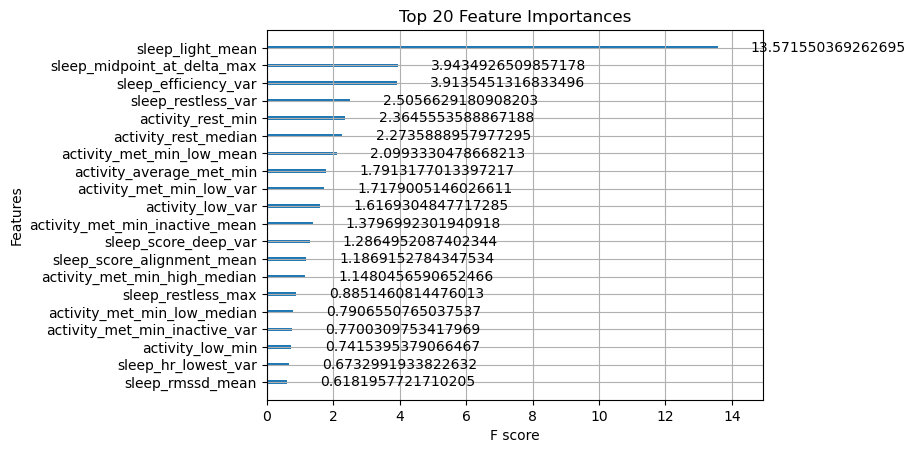

In [55]:
xgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.title('Top 20 Feature Importances')
plt.show()

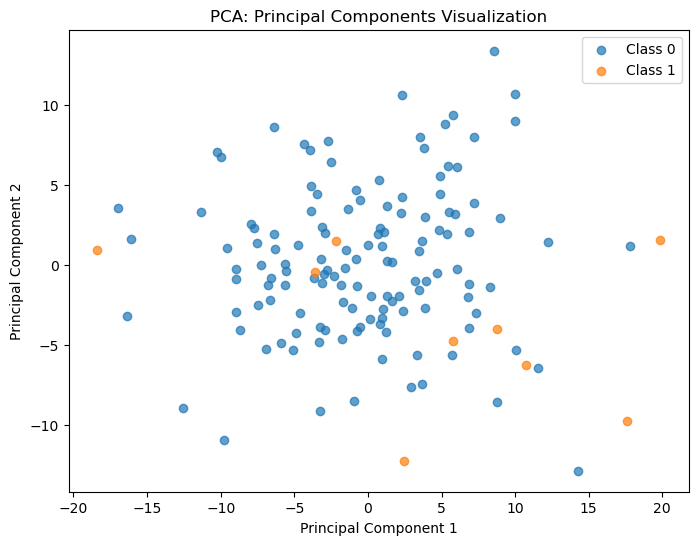

Explained Variance Ratio: [0.18885699 0.09599982]


In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA 수행
pca = PCA(n_components=2)  # 주요 2개의 성분으로 차원 축소
X_train_pca = pca.fit_transform(X_train_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_train.values  # 타겟 레이블 추가

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                label=f'Class {target}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components Visualization')
plt.legend()
plt.show()

# PCA 설명 분산 비율 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [57]:
# XGBoost에서 상위 피쳐만 가져오기
top_features = importance_df['Feature'].head(10).tolist()

In [58]:
top_features

['sleep_midpoint_time_median',
 'sleep_duration_median',
 'sleep_light_median',
 'activity_cal_active_median',
 'sleep_light_mean',
 'sleep_score_latency_mean',
 'sleep_rem_var',
 'activity_low_var',
 'sleep_score_deep_var',
 'activity_met_min_low_median']

### **XGBoost로 뽑은 중요한 피쳐의 PCA**

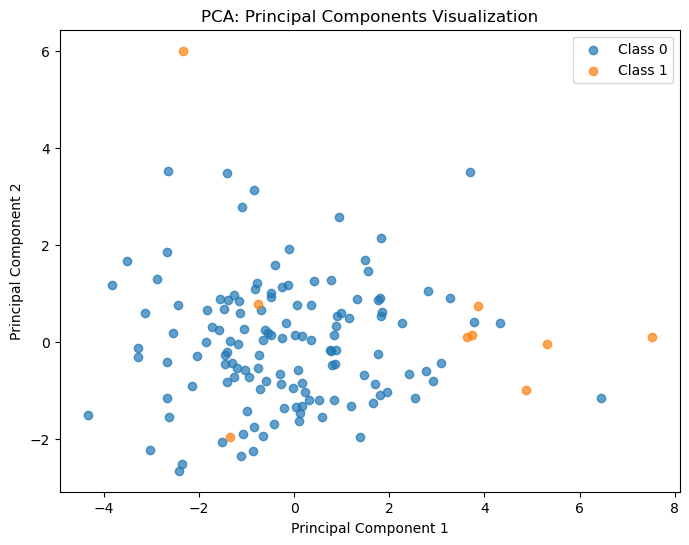

Explained Variance Ratio: [0.41637611 0.17683145]


In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])

# PCA 수행
pca = PCA(n_components=2)  # 주요 2개의 성분으로 차원 축소
X_train_pca = pca.fit_transform(X_train_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_train.values  # 타겟 레이블 추가

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                label=f'Class {target}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components Visualization')
plt.legend()
plt.show()

# PCA 설명 분산 비율 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

### **XGBoost로 뽑은 중요한 피쳐로 예측모델 구성**

### **1. 로지스틱회귀**

In [60]:
X_train = train_agg[top_features]
y_train = train_agg["DIAG_NM"]
X_test = val_agg[top_features]
y_test = val_agg["DIAG_NM"]

In [61]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.131171
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  141
Model:                          Logit   Df Residuals:                      130
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.4474
Time:                        23:43:02   Log-Likelihood:                -18.495
converged:                       True   LL-Null:                       -33.470
Covariance Type:            nonrobust   LLR p-value:                 0.0008728
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.8613      9.961      0.187      0.852  

In [62]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))	
print("precision: ", precision_score(y_test, y_pred))	
print("f1_score: ", f1_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.40      0.67      0.50         3

    accuracy                           0.88        33
   macro avg       0.68      0.78      0.72        33
weighted avg       0.91      0.88      0.89        33

Confusion Matrix:
 [[27  3]
 [ 1  2]]
recall:  0.6666666666666666
precision:  0.4
f1_score:  0.5


### **2. 나이브 베이즈**

In [63]:
# 나이브 베이즈 모델 학습
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 예측
y_pred_nb = nb_model.predict(X_test)

# 평가
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("recall: ", recall_score(y_test, y_pred_nb))	
print("precision: ", precision_score(y_test, y_pred_nb))	
print("f1_score: ", f1_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.67      0.80         3

    accuracy                           0.97        33
   macro avg       0.98      0.83      0.89        33
weighted avg       0.97      0.97      0.97        33

Confusion Matrix:
 [[30  0]
 [ 1  2]]
recall:  0.6666666666666666
precision:  1.0
f1_score:  0.8


### **3. XGBoost**

In [64]:
# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("recall: ", recall_score(y_test, y_pred_xgb))	
print("precision: ", precision_score(y_test, y_pred_xgb))	
print("f1_score: ", f1_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9393939393939394
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.33      0.50         3

    accuracy                           0.94        33
   macro avg       0.97      0.67      0.73        33
weighted avg       0.94      0.94      0.93        33

Confusion Matrix:
 [[30  0]
 [ 2  1]]
recall:  0.3333333333333333
precision:  1.0
f1_score:  0.5


### **4. LightGBM**

In [65]:
# LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train, y_train)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 평가
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("recall: ", recall_score(y_test, y_pred_lgbm))	
print("precision: ", precision_score(y_test, y_pred_lgbm))	
print("f1_score: ", f1_score(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.9393939393939394
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.33      0.50         3

    accuracy                           0.94        33
   macro avg       0.97      0.67      0.73        33
weighted avg       0.94      0.94      0.93        33

Confusion Matrix:
 [[30  0]
 [ 2  1]]
recall:  0.3333333333333333
precision:  1.0
f1_score:  0.5


### **5. DecisionTree**

In [66]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 학습
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 평가
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("recall: ", recall_score(y_test, y_pred_dt))	
print("precision: ", precision_score(y_test, y_pred_dt))	
print("f1_score: ", f1_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       0.00      0.00      0.00         3

    accuracy                           0.91        33
   macro avg       0.45      0.50      0.48        33
weighted avg       0.83      0.91      0.87        33

Confusion Matrix:
 [[30  0]
 [ 3  0]]
recall:  0.0
precision:  0.0
f1_score:  0.0


### **SMOTE**

In [67]:
# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_agg[top_features]
y_train = train_agg["DIAG_NM"]
X_test = val_agg[top_features]
y_test = val_agg["DIAG_NM"]

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (141, 10) (141,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (264, 10) (264,)
SMOTE 적용 후 레이블 값 분포: 
 DIAG_NM
0    132
1    132
Name: count, dtype: int64


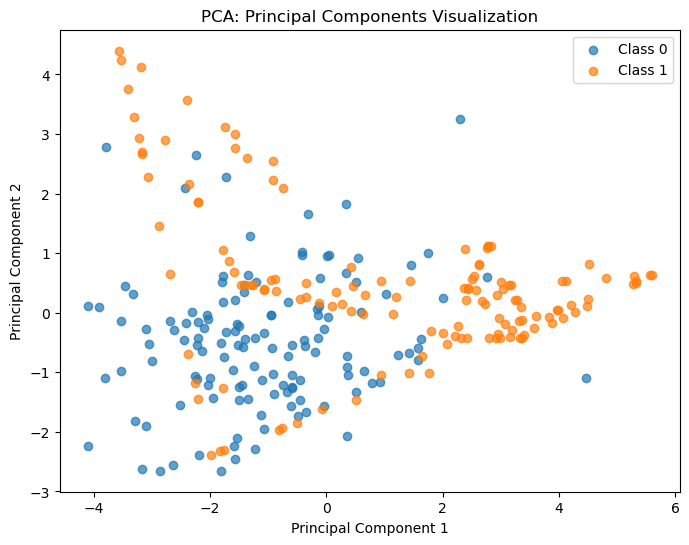

Explained Variance Ratio: [0.55146497 0.17034588]


In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)

# PCA 수행
pca = PCA(n_components=2)  # 주요 2개의 성분으로 차원 축소
X_train_pca = pca.fit_transform(X_train_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_train_over.values  # 타겟 레이블 추가

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                label=f'Class {target}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components Visualization')
plt.legend()
plt.show()

# PCA 설명 분산 비율 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

### **1. 로지스틱회귀**

In [69]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train_over)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train_over, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.319008
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  264
Model:                          Logit   Df Residuals:                      253
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.5398
Time:                        23:43:03   Log-Likelihood:                -84.218
converged:                       True   LL-Null:                       -182.99
Covariance Type:            nonrobust   LLR p-value:                 5.243e-37
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4192      6.188     -0.553      0.581   

In [70]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train_over, y_train_over)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))	
print("precision: ", precision_score(y_test, y_pred))	
print("f1_score: ", f1_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.40      0.67      0.50         3

    accuracy                           0.88        33
   macro avg       0.68      0.78      0.72        33
weighted avg       0.91      0.88      0.89        33

Confusion Matrix:
 [[27  3]
 [ 1  2]]
recall:  0.6666666666666666
precision:  0.4
f1_score:  0.5


### **2. 나이브 베이즈**

In [71]:
# 나이브 베이즈 모델 학습
nb_model = GaussianNB()
nb_model.fit(X_train_over, y_train_over)

# 예측
y_pred_nb = nb_model.predict(X_test)

# 평가
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("recall: ", recall_score(y_test, y_pred_nb))	
print("precision: ", precision_score(y_test, y_pred_nb))	
print("f1_score: ", f1_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.50      1.00      0.67         3

    accuracy                           0.91        33
   macro avg       0.75      0.95      0.81        33
weighted avg       0.95      0.91      0.92        33

Confusion Matrix:
 [[27  3]
 [ 0  3]]
recall:  1.0
precision:  0.5
f1_score:  0.6666666666666666


### **3. XGBoost**

In [72]:
# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_over, y_train_over)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("recall: ", recall_score(y_test, y_pred_xgb))	
print("precision: ", precision_score(y_test, y_pred_xgb))	
print("f1_score: ", f1_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.75      1.00      0.86         3

    accuracy                           0.97        33
   macro avg       0.88      0.98      0.92        33
weighted avg       0.98      0.97      0.97        33

Confusion Matrix:
 [[29  1]
 [ 0  3]]
recall:  1.0
precision:  0.75
f1_score:  0.8571428571428571


### **4. LightGBM**

In [73]:
# LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train_over, y_train_over)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 평가
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("recall: ", recall_score(y_test, y_pred_lgbm))	
print("precision: ", precision_score(y_test, y_pred_lgbm))	
print("f1_score: ", f1_score(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.9393939393939394
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.67      0.67      0.67         3

    accuracy                           0.94        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.94      0.94      0.94        33

Confusion Matrix:
 [[29  1]
 [ 1  2]]
recall:  0.6666666666666666
precision:  0.6666666666666666
f1_score:  0.6666666666666666


### **5. DecisionTree**

In [74]:
# 결정 트리 모델 학습
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_over, y_train_over)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 평가
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("recall: ", recall_score(y_test, y_pred_dt))	
print("precision: ", precision_score(y_test, y_pred_dt))	
print("f1_score: ", f1_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8484848484848485
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.33      0.67      0.44         3

    accuracy                           0.85        33
   macro avg       0.65      0.77      0.68        33
weighted avg       0.91      0.85      0.87        33

Confusion Matrix:
 [[26  4]
 [ 1  2]]
recall:  0.6666666666666666
precision:  0.3333333333333333
f1_score:  0.4444444444444444


### **BorderLine SMOTE**

In [75]:
from imblearn.over_sampling import BorderlineSMOTE

# Borderline-SMOTE 적용
borderline_smote = BorderlineSMOTE(kind='borderline-1', random_state=42)
X_resampled, y_resampled = borderline_smote.fit_resample(X_train, y_train)

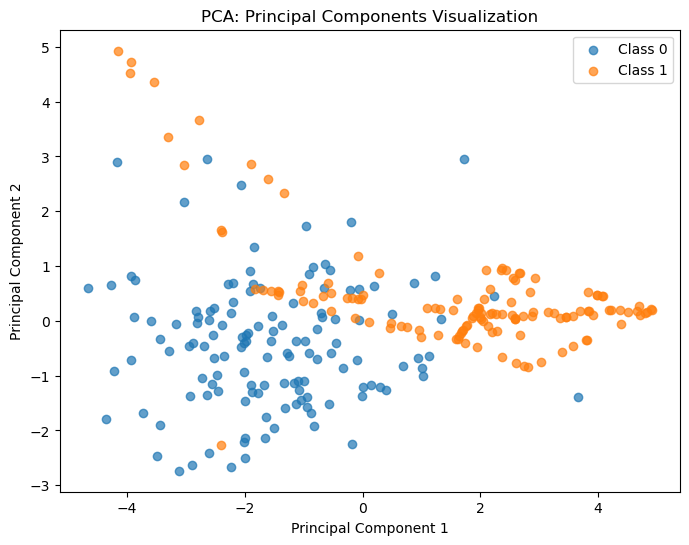

Explained Variance Ratio: [0.58301982 0.13992393]


In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)

# PCA 수행
pca = PCA(n_components=2)  # 주요 2개의 성분으로 차원 축소
X_train_pca = pca.fit_transform(X_train_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_resampled.values  # 타겟 레이블 추가

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                label=f'Class {target}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components Visualization')
plt.legend()
plt.show()

# PCA 설명 분산 비율 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

### **1. 로지스틱회귀**

In [77]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_resampled)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_resampled, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.172303
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  264
Model:                          Logit   Df Residuals:                      253
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.7514
Time:                        23:43:03   Log-Likelihood:                -45.488
converged:                       True   LL-Null:                       -182.99
Covariance Type:            nonrobust   LLR p-value:                 2.945e-53
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.0979      8.916      0.460      0.646  

In [78]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_resampled, y_resampled)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))	
print("precision: ", precision_score(y_test, y_pred))	
print("f1_score: ", f1_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.40      0.67      0.50         3

    accuracy                           0.88        33
   macro avg       0.68      0.78      0.72        33
weighted avg       0.91      0.88      0.89        33

Confusion Matrix:
 [[27  3]
 [ 1  2]]
recall:  0.6666666666666666
precision:  0.4
f1_score:  0.5


### **2. 나이브 베이즈**

In [79]:
# 나이브 베이즈 모델 학습
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)

# 예측
y_pred_nb = nb_model.predict(X_test)

# 평가
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("recall: ", recall_score(y_test, y_pred_nb))	
print("precision: ", precision_score(y_test, y_pred_nb))	
print("f1_score: ", f1_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.50      1.00      0.67         3

    accuracy                           0.91        33
   macro avg       0.75      0.95      0.81        33
weighted avg       0.95      0.91      0.92        33

Confusion Matrix:
 [[27  3]
 [ 0  3]]
recall:  1.0
precision:  0.5
f1_score:  0.6666666666666666


### **3. XGBoost**

In [80]:
# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("recall: ", recall_score(y_test, y_pred_xgb))	
print("precision: ", precision_score(y_test, y_pred_xgb))	
print("f1_score: ", f1_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.75      1.00      0.86         3

    accuracy                           0.97        33
   macro avg       0.88      0.98      0.92        33
weighted avg       0.98      0.97      0.97        33

Confusion Matrix:
 [[29  1]
 [ 0  3]]
recall:  1.0
precision:  0.75
f1_score:  0.8571428571428571


### **4. LightGBM**

In [81]:
# LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_resampled, y_resampled)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 평가
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("recall: ", recall_score(y_test, y_pred_lgbm))	
print("precision: ", precision_score(y_test, y_pred_lgbm))	
print("f1_score: ", f1_score(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.67      0.80         3

    accuracy                           0.97        33
   macro avg       0.98      0.83      0.89        33
weighted avg       0.97      0.97      0.97        33

Confusion Matrix:
 [[30  0]
 [ 1  2]]
recall:  0.6666666666666666
precision:  1.0
f1_score:  0.8


### **5. DecisionTree**

In [82]:
# 결정 트리 모델 학습
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_resampled, y_resampled)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 평가
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("recall: ", recall_score(y_test, y_pred_dt))	
print("precision: ", precision_score(y_test, y_pred_dt))	
print("f1_score: ", f1_score(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         3

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix:
 [[30  0]
 [ 0  3]]
recall:  1.0
precision:  1.0
f1_score:  1.0


BorderLine SMOTE가 일반적인 SMOTE보다 모델 지표도 좋고, RECALL이 높았다.